# Day 1

1. 详细阅读项目overview和data介绍。(https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview)
2. 了解EDA的流程（Exploratory Data Analysis）
3. 找到training set (sales_train.csv) 中"item_cnt_day"和“item_price”的异常值（outliers），画图展示。
4. 将训练集中daily的销售数据，Aggregate成monthly level的数据。training set (sales_train.csv) 是daily级别。


备注： 

    item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
    item_price - current price of an item

### Loading the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_train = pd.read_csv('./data/sales_train.csv')

In [3]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


## 找到training set (sales_train.csv) 中"item_cnt_day"和“item_price”的异常值（outliers），画图展示。

In [5]:
plt.rcParams['figure.figsize'] = [8, 5]

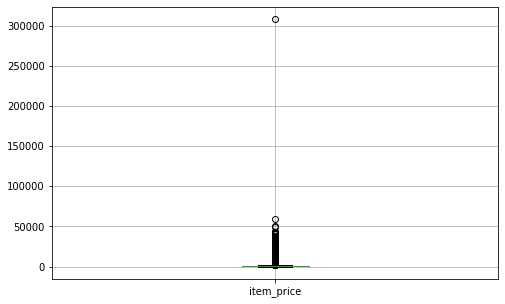

In [6]:
sales_train[['item_price']].boxplot()
#boxplot = sales_train.boxplot(column= ['item_price','item_cnt_day'])

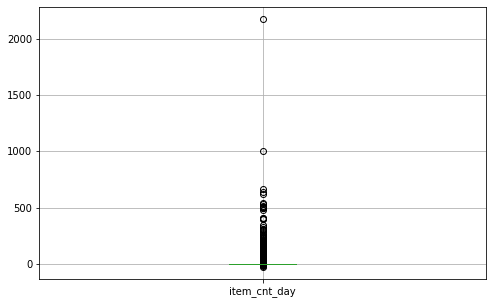

In [7]:
sales_train[['item_cnt_day']].boxplot()

In [8]:
sales_train[sales_train['item_price']<=0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


One data sample has a negative item_price, it should be replaced with the mean. 

In [9]:
# returns the outliers 

def outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] < fence_low)| (df_in[col_name] > fence_high)]
    return df_out

In [10]:
outlier(sales_train,'item_price').sort_values(by = 'item_price')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2146669,13.11.2014,22,18,5820,2124.15,1.0
2934883,21.10.2015,33,25,3027,2124.15,1.0
1162403,23.12.2013,11,12,1856,2124.15,1.0
968091,21.10.2013,9,30,3329,2124.15,1.0
2514898,07.03.2015,26,54,15935,2124.16,1.0
...,...,...,...,...,...,...
2910156,29.10.2015,33,12,13403,42990.00,1.0
2327159,29.01.2015,24,12,7241,49782.00,1.0
1488135,20.03.2014,14,25,13199,50999.00,1.0
885138,17.09.2013,8,12,11365,59200.00,1.0


In [11]:
outlier(sales_train,'item_cnt_day').sort_values(by = 'item_id')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
468956,06.05.2013,4,46,28,398.0,-1.0
90914,18.01.2013,0,50,29,2499.0,-1.0
125084,24.02.2013,1,42,30,399.0,4.0
153860,16.02.2013,1,23,30,399.0,2.0
153861,17.02.2013,1,23,30,399.0,3.0
...,...,...,...,...,...,...
2826954,20.08.2015,31,22,22167,299.0,3.0
2826955,28.08.2015,31,22,22167,299.0,2.0
2924952,14.10.2015,33,25,22167,299.0,2.0
1928987,28.08.2014,19,12,22167,299.0,2.0


## 将训练集中daily的销售数据，Aggregate成monthly level的数据。training set (sales_train.csv) 是daily级别。

In [12]:
sales_train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [13]:
'''
sales_train['date'] = pd.to_datetime(sales_train['date'])
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month
sales_train_monthly = sales_train.groupby(['shop_id','item_id','year','month'],as_index = False).agg({'item_price':'mean','item_cnt_day':'sum'})
'''
sales_train_monthly = sales_train.groupby(['date_block_num','shop_id','item_id'], as_index = False).agg({'item_price':'mean','item_cnt_day':'sum'}).rename(columns = {'item_price':'avg_item_price','item_cnt_day':'item_cnt_month'})



In [14]:
sales_train_monthly.sort_values(by = 'item_id')

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
1101022,20,54,0,58.0,1.0
1015412,18,55,1,4490.0,1.0
1061583,19,55,1,4490.0,1.0
877718,15,55,1,4490.0,2.0
1102844,20,55,1,4490.0,1.0
...,...,...,...,...,...
167027,2,43,22168,798.5,1.0
473482,8,12,22168,799.0,1.0
11463,0,12,22168,799.0,1.0
107745,1,42,22168,799.0,1.0


## EDA 画点图看看

## 所有产品销售数量总和随时间的变化

In [15]:
monthly_change = sales_train.groupby(['date_block_num'], as_index = False).agg({'item_price':'mean','item_cnt_day':'sum'}).rename(columns = {'item_price':'avg_item_price','item_cnt_day':'item_cnt_month'})
monthly_change.head()

,date_block_num,avg_item_price,item_cnt_month
0,0,710.622127,131479.0
1,1,695.866856,128090.0
2,2,694.688063,147142.0
3,3,653.633797,107190.0
4,4,624.179993,106970.0


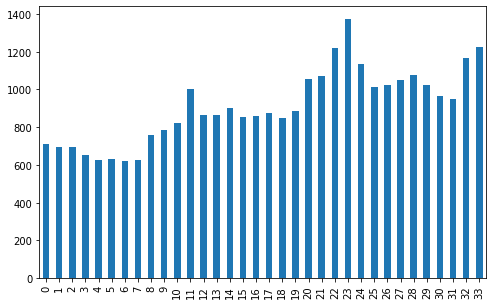

In [16]:
monthly_change['avg_item_price'].plot.bar()

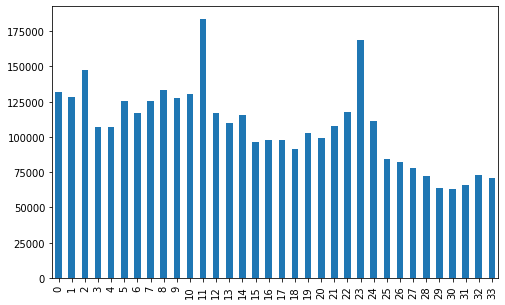

In [17]:
monthly_change['item_cnt_month'].plot.bar()

价格有波动，但总体趋势在上升，可以理解，因为通货膨胀物价上涨……
平均价格和销售额的波动曲线很相似，几乎同时上升下降。把数据标准化画在同一张图片上看看他们是不是真的一起变化👀

In [18]:
from sklearn import preprocessing

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
monthly_change_minmax = min_max_scaler.fit_transform(monthly_change)

In [20]:
monthly_change['item_cnt_month_min_max'] = monthly_change_minmax[:,2]
monthly_change['avg_item_price_min_max'] = monthly_change_minmax[:,1]

In [21]:
monthly_change.head()

,date_block_num,avg_item_price,item_cnt_month,item_cnt_month_min_max,avg_item_price_min_max
0,0,710.622127,131479.0,0.568366,0.122208
1,1,695.866856,128090.0,0.540161,0.102617
2,2,694.688063,147142.0,0.698722,0.101052
3,3,653.633797,107190.0,0.366219,0.046544
4,4,624.179993,106970.0,0.364388,0.007438


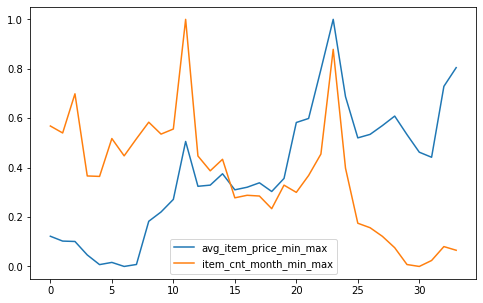

In [22]:
monthly_change[['avg_item_price_min_max','item_cnt_month_min_max']].plot.line()

In [23]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [24]:
items = pd.read_csv('./data/items.csv')
items 

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


## Exploring the best selling item categries

In [25]:
item_categories =  pd.read_csv('./data/item_categories.csv')
item_categories 

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


看不懂俄语，但是items里的数据太多不作处理了，用google sheet Google Translate 功能把item_categories 里的item_category_name 转换成英文，更好理解数据。

In [26]:
item_categories_English =  pd.read_csv('./data/item_categories_English.csv')
item_categories_English.drop('item_category_name',axis = 1)  #反正也看不懂 删了算了

,item_category_id,item_category_name_English
0,0,PC - Headsets / Headphones
1,1,Accessories - PS2
2,2,Accessories - PS3
3,3,Accessories - PS4
4,4,Accessories - PSP
...,...,...
79,79,System Tools
80,80,Utilities - Tickets
81,81,Net carriers (spire)
82,82,Net carriers (piece)


In [27]:
tmp1 = pd.merge(sales_train_monthly, items, on='item_id', how='left') 
sales_train_monthly1 = pd.merge(tmp1, item_categories_English, on='item_category_id', how='left') 

sales_train_monthly1  

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,item_name,item_category_id,item_category_name,item_category_name_English
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,Movie - DVD
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,Movie - Blu-Ray
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,Movie - DVD
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,Movie - DVD
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,Music - MP3
...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0,Элемент питания DURACELL LR03-BC2,83,Элементы питания,batteries
1609120,33,59,22088,119.0,2.0,Элемент питания DURACELL LR06-BC2,83,Элементы питания,batteries
1609121,33,59,22091,179.0,1.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,Элементы питания,batteries
1609122,33,59,22100,629.0,1.0,Энциклопедия Adventure Time,42,"Книги - Артбуки, энциклопедии","Books - artbook, encyclopedia"


In [28]:
sales_train_monthly1.drop(columns=['item_name','item_category_name'],inplace = True)

In [29]:
sales_train_monthly1

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,item_category_id,item_category_name_English
0,0,0,32,221.0,6.0,40,Movie - DVD
1,0,0,33,347.0,3.0,37,Movie - Blu-Ray
2,0,0,35,247.0,1.0,40,Movie - DVD
3,0,0,43,221.0,1.0,40,Movie - DVD
4,0,0,51,128.5,2.0,57,Music - MP3
...,...,...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0,83,batteries
1609120,33,59,22088,119.0,2.0,83,batteries
1609121,33,59,22091,179.0,1.0,83,batteries
1609122,33,59,22100,629.0,1.0,42,"Books - artbook, encyclopedia"


In [30]:
category_monthly = sales_train_monthly1.groupby(['item_category_id'], as_index = False).agg({'avg_item_price':'mean','item_cnt_month':'sum'}) 
category_monthly.sort_values(by = 'item_cnt_month', inplace = True)
category_monthly

,item_category_id,avg_item_price,item_cnt_month
51,51,129.000000,1.0
10,10,1998.000000,1.0
1,1,215.500000,2.0
53,53,282.333333,3.0
52,52,100.000000,3.0
...,...,...,...
37,37,400.055226,203284.0
19,19,1423.005469,254887.0
55,55,281.804765,348591.0
30,30,421.332928,456540.0


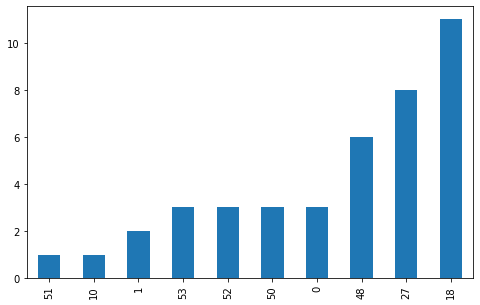

In [31]:
category_monthly['item_cnt_month'][0:10].plot.bar()

# Day 2

1. 随机挑选10个item，将销售曲线图画出（x轴是月份，y轴是item_cnt_month）
2. reformat原本aggregated后的monthly数据，成时间序列状。
3. 简单建模，尝试用0-32的月份的数据，去predict“33“的月份。

## 1. random select 10 items and plot the sales 

In [32]:
sales_train_monthly 

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,128.5,2.0
...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0
1609120,33,59,22088,119.0,2.0
1609121,33,59,22091,179.0,1.0
1609122,33,59,22100,629.0,1.0


In [33]:
random_10 = sales_train_monthly[['item_id']].sample(n=10)
random_10

,item_id
1127816,979
1124663,3635
1085569,1235
824791,7980
585619,4352
902708,6495
1593323,7657
1267849,11921
88875,18073
97895,3869


In [34]:
random_10_sales = sales_train_monthly.loc[sales_train_monthly['item_id'].isin(random_10['item_id'])].reset_index()
random_10_sales 

,index,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
0,336,0,0,3869,1995.00,2.0
1,611,0,0,6495,554.00,17.0
2,2423,0,1,1235,173.00,1.0
3,2762,0,1,6495,554.00,6.0
4,4079,0,2,3869,2498.75,2.0
...,...,...,...,...,...,...
3959,1603221,33,49,7657,349.00,1.0
3960,1604931,33,53,7657,349.00,1.0
3961,1605036,33,53,11921,549.00,1.0
3962,1608083,33,58,7657,349.00,1.0


In [35]:
random_10_sales['shop_id'] = random_10_sales['shop_id'].astype('object')
random_10_sale = random_10_sales.groupby(['item_id','date_block_num'],as_index = False).agg({'avg_item_price':'mean','item_cnt_month':'sum'})
random_10_sale
 

,item_id,date_block_num,avg_item_price,item_cnt_month
0,979,18,955.747312,58.0
1,979,19,999.000000,24.0
2,979,20,999.000000,8.0
3,979,21,999.000000,9.0
4,979,22,999.000000,5.0
...,...,...,...,...
186,11921,31,545.810556,55.0
187,11921,32,540.700000,34.0
188,11921,33,544.000000,41.0
189,18073,1,3249.000000,1.0


10*34,应该有340行数据，补充缺失月份

In [36]:
all_rows = pd.concat([random_10]*34,ignore_index = True)

In [37]:
all_rows.sort_values(by = 'item_id',inplace = True)

In [38]:
month = np.tile(np.arange(0,34,1).reshape((34,1)),(10,1))
all_rows['date_block_num'] = month

In [39]:
full_random_10_sale = pd.merge(random_10_sale,all_rows,on = ['item_id','date_block_num'],how = 'right')
full_random_10_sale = full_random_10_sale.fillna(0)
full_random_10_sale.sort_values(by = ['item_id','date_block_num'],inplace = True)

In [40]:
def plot_each_item(df,item_id):
    fig = plt.figure(figsize=(25, 20), dpi=100)
    plt.plot(df['date_block_num'],df['item_cnt_month'],label = '.')
    plt.xlabel('date_block_num')
    plt.ylabel('item_cnt_month')
    plt.title('{}'.format(item_id))
    plt.savefig('./sales_plot/{}'.format(item_id))
    

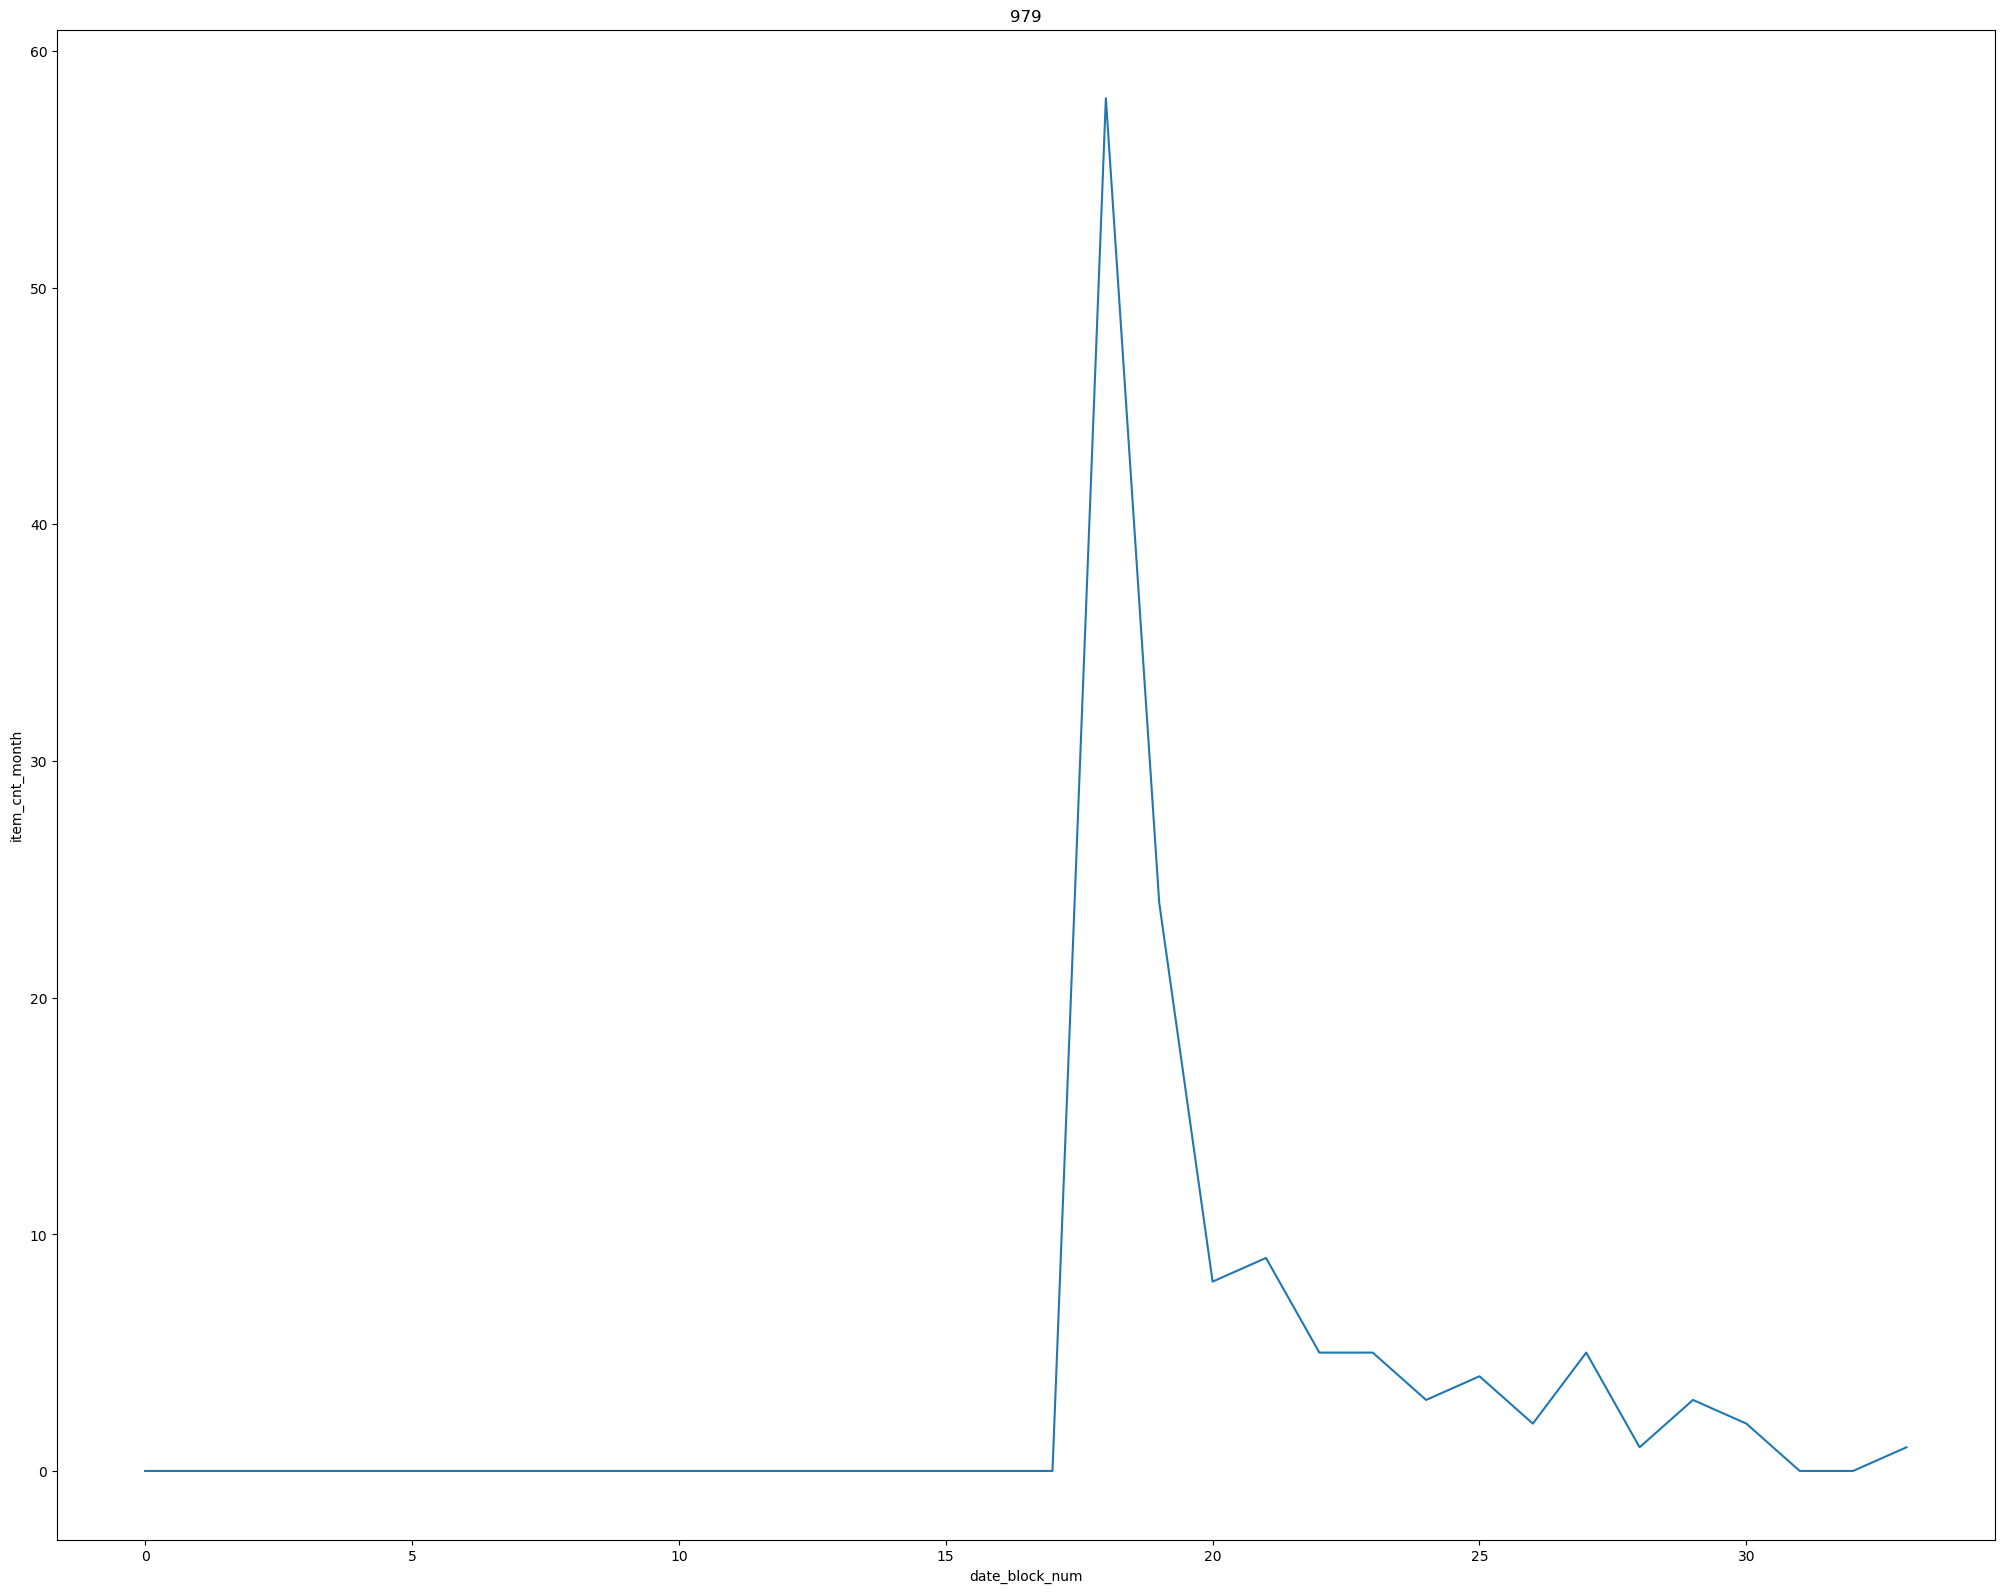

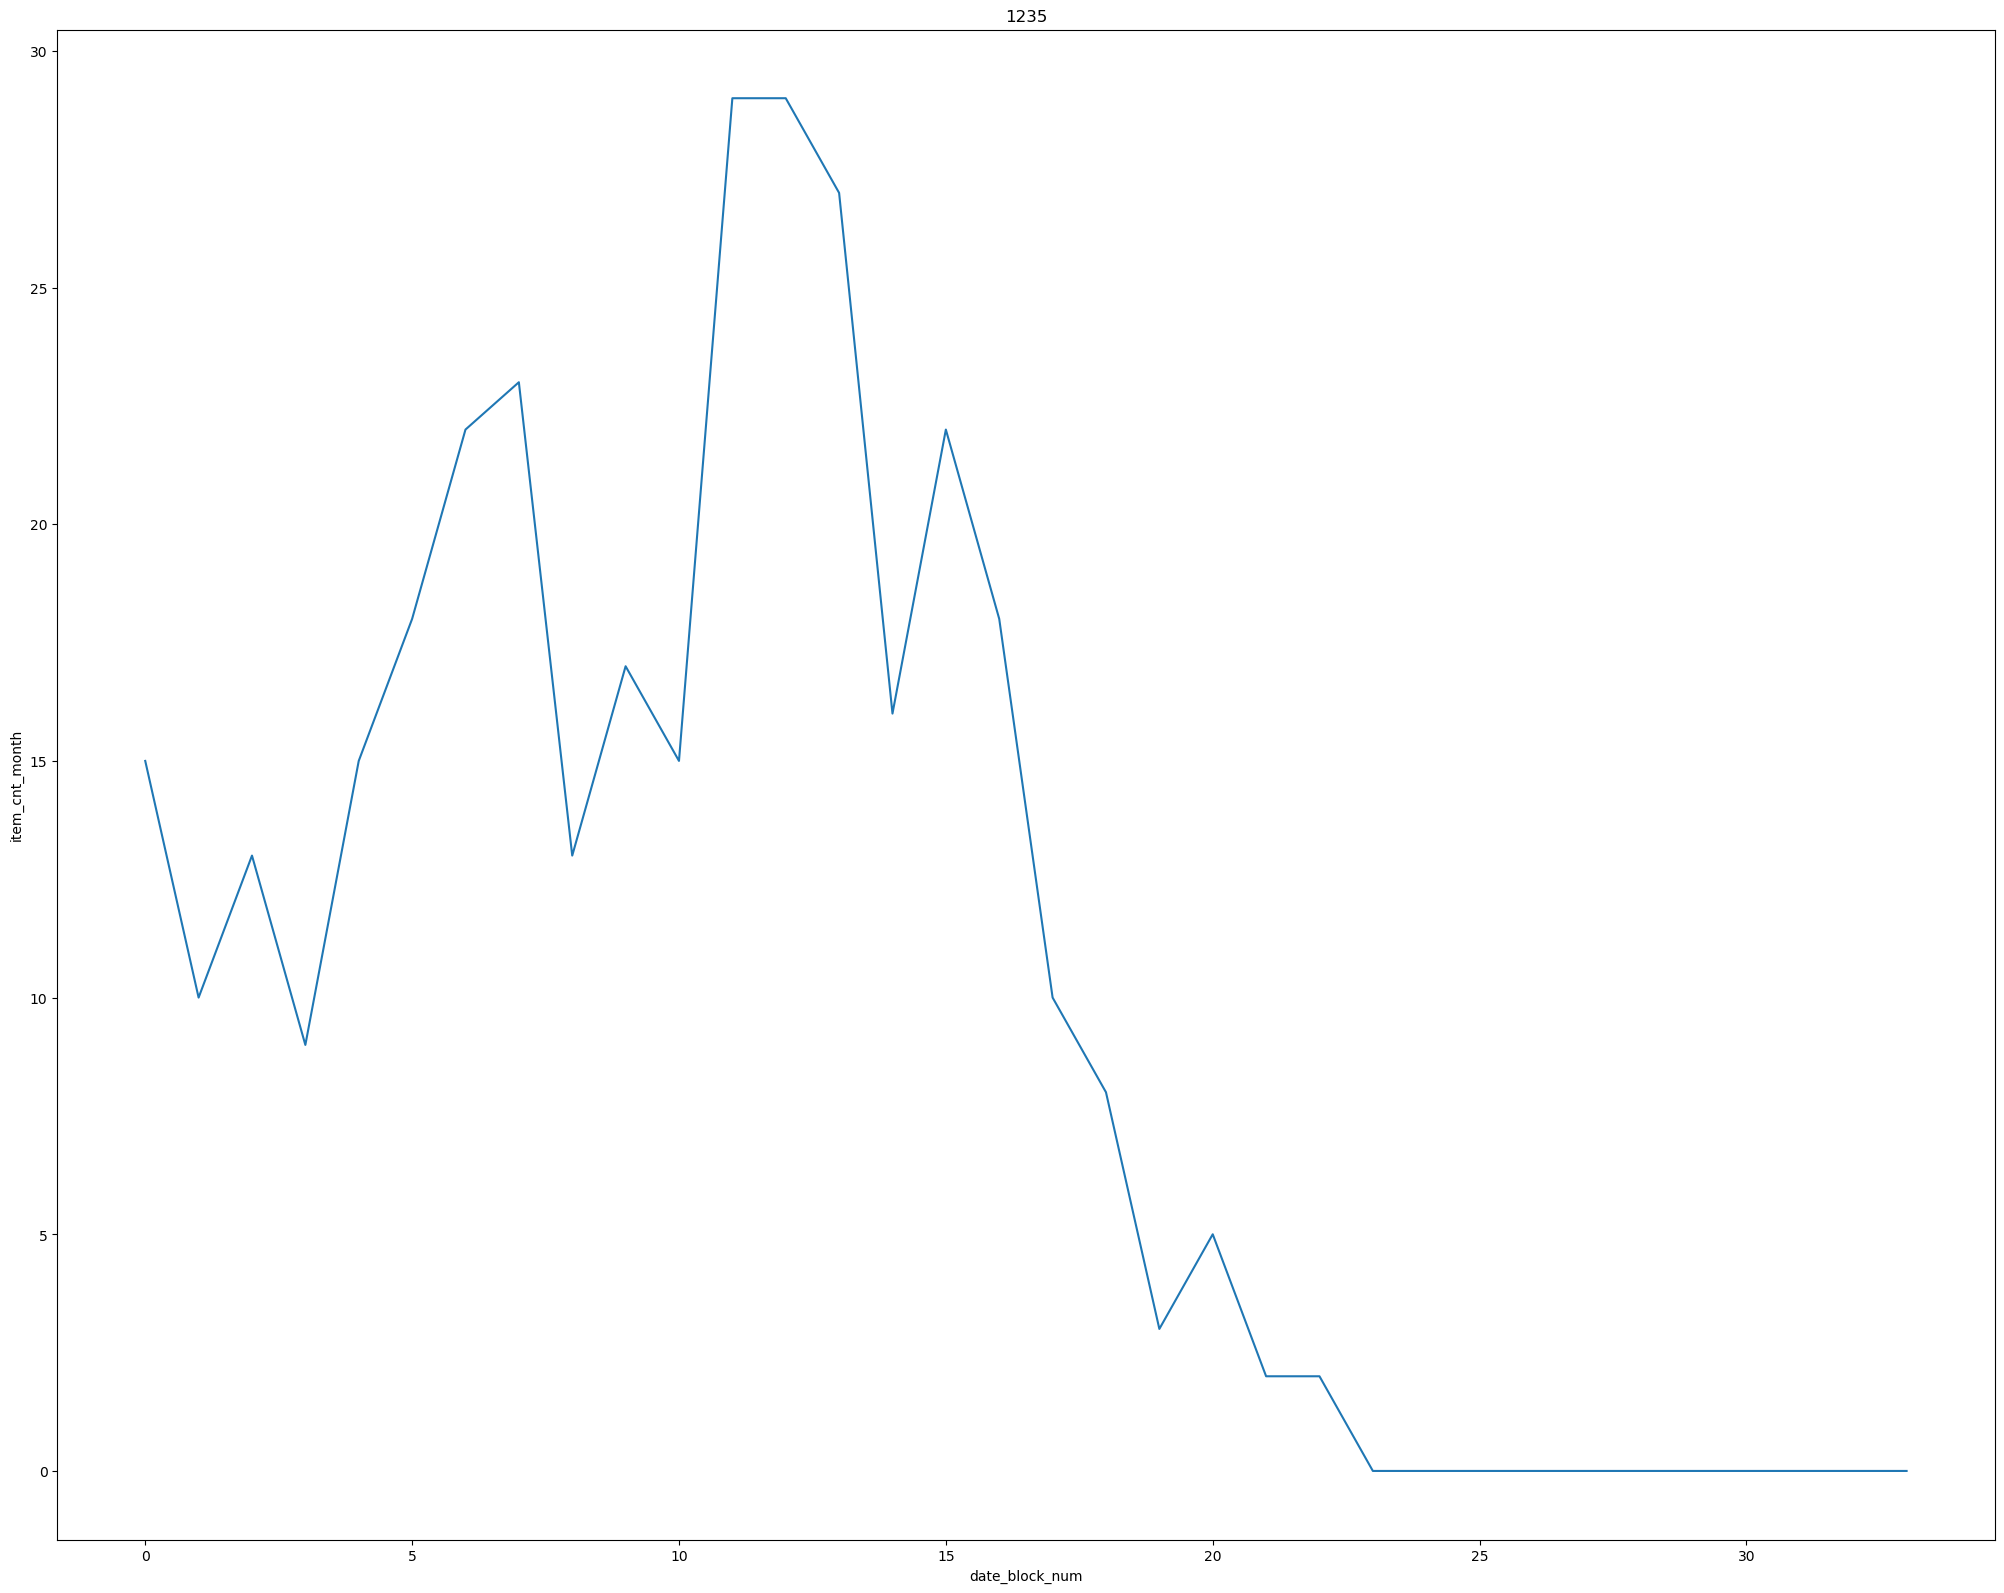

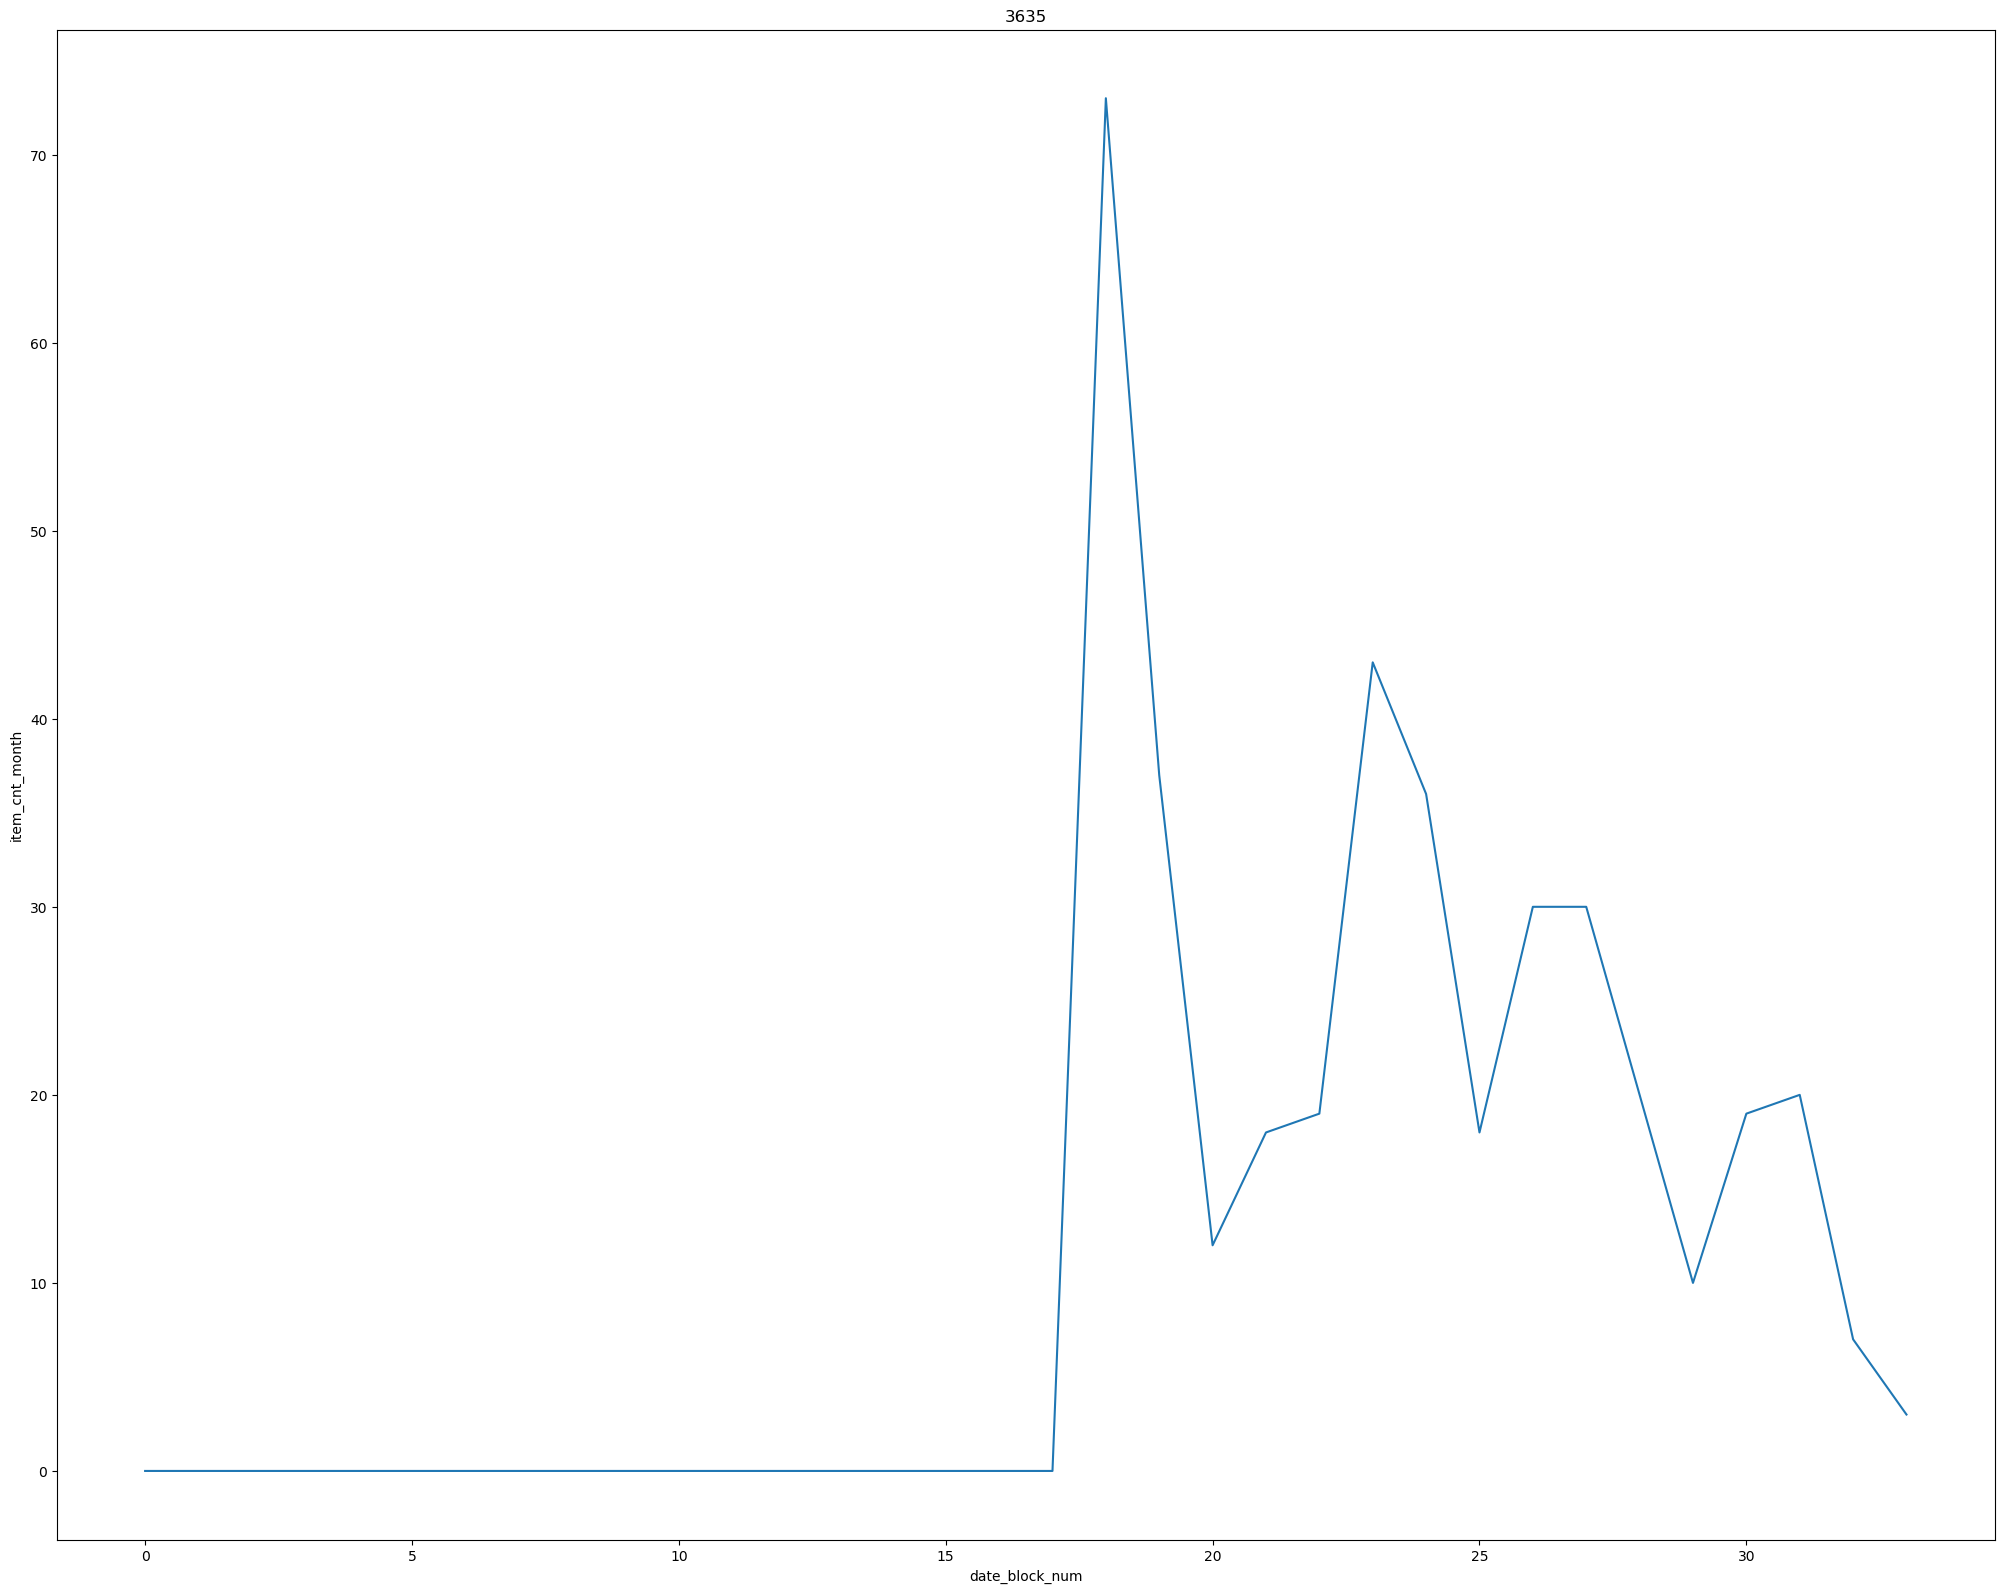

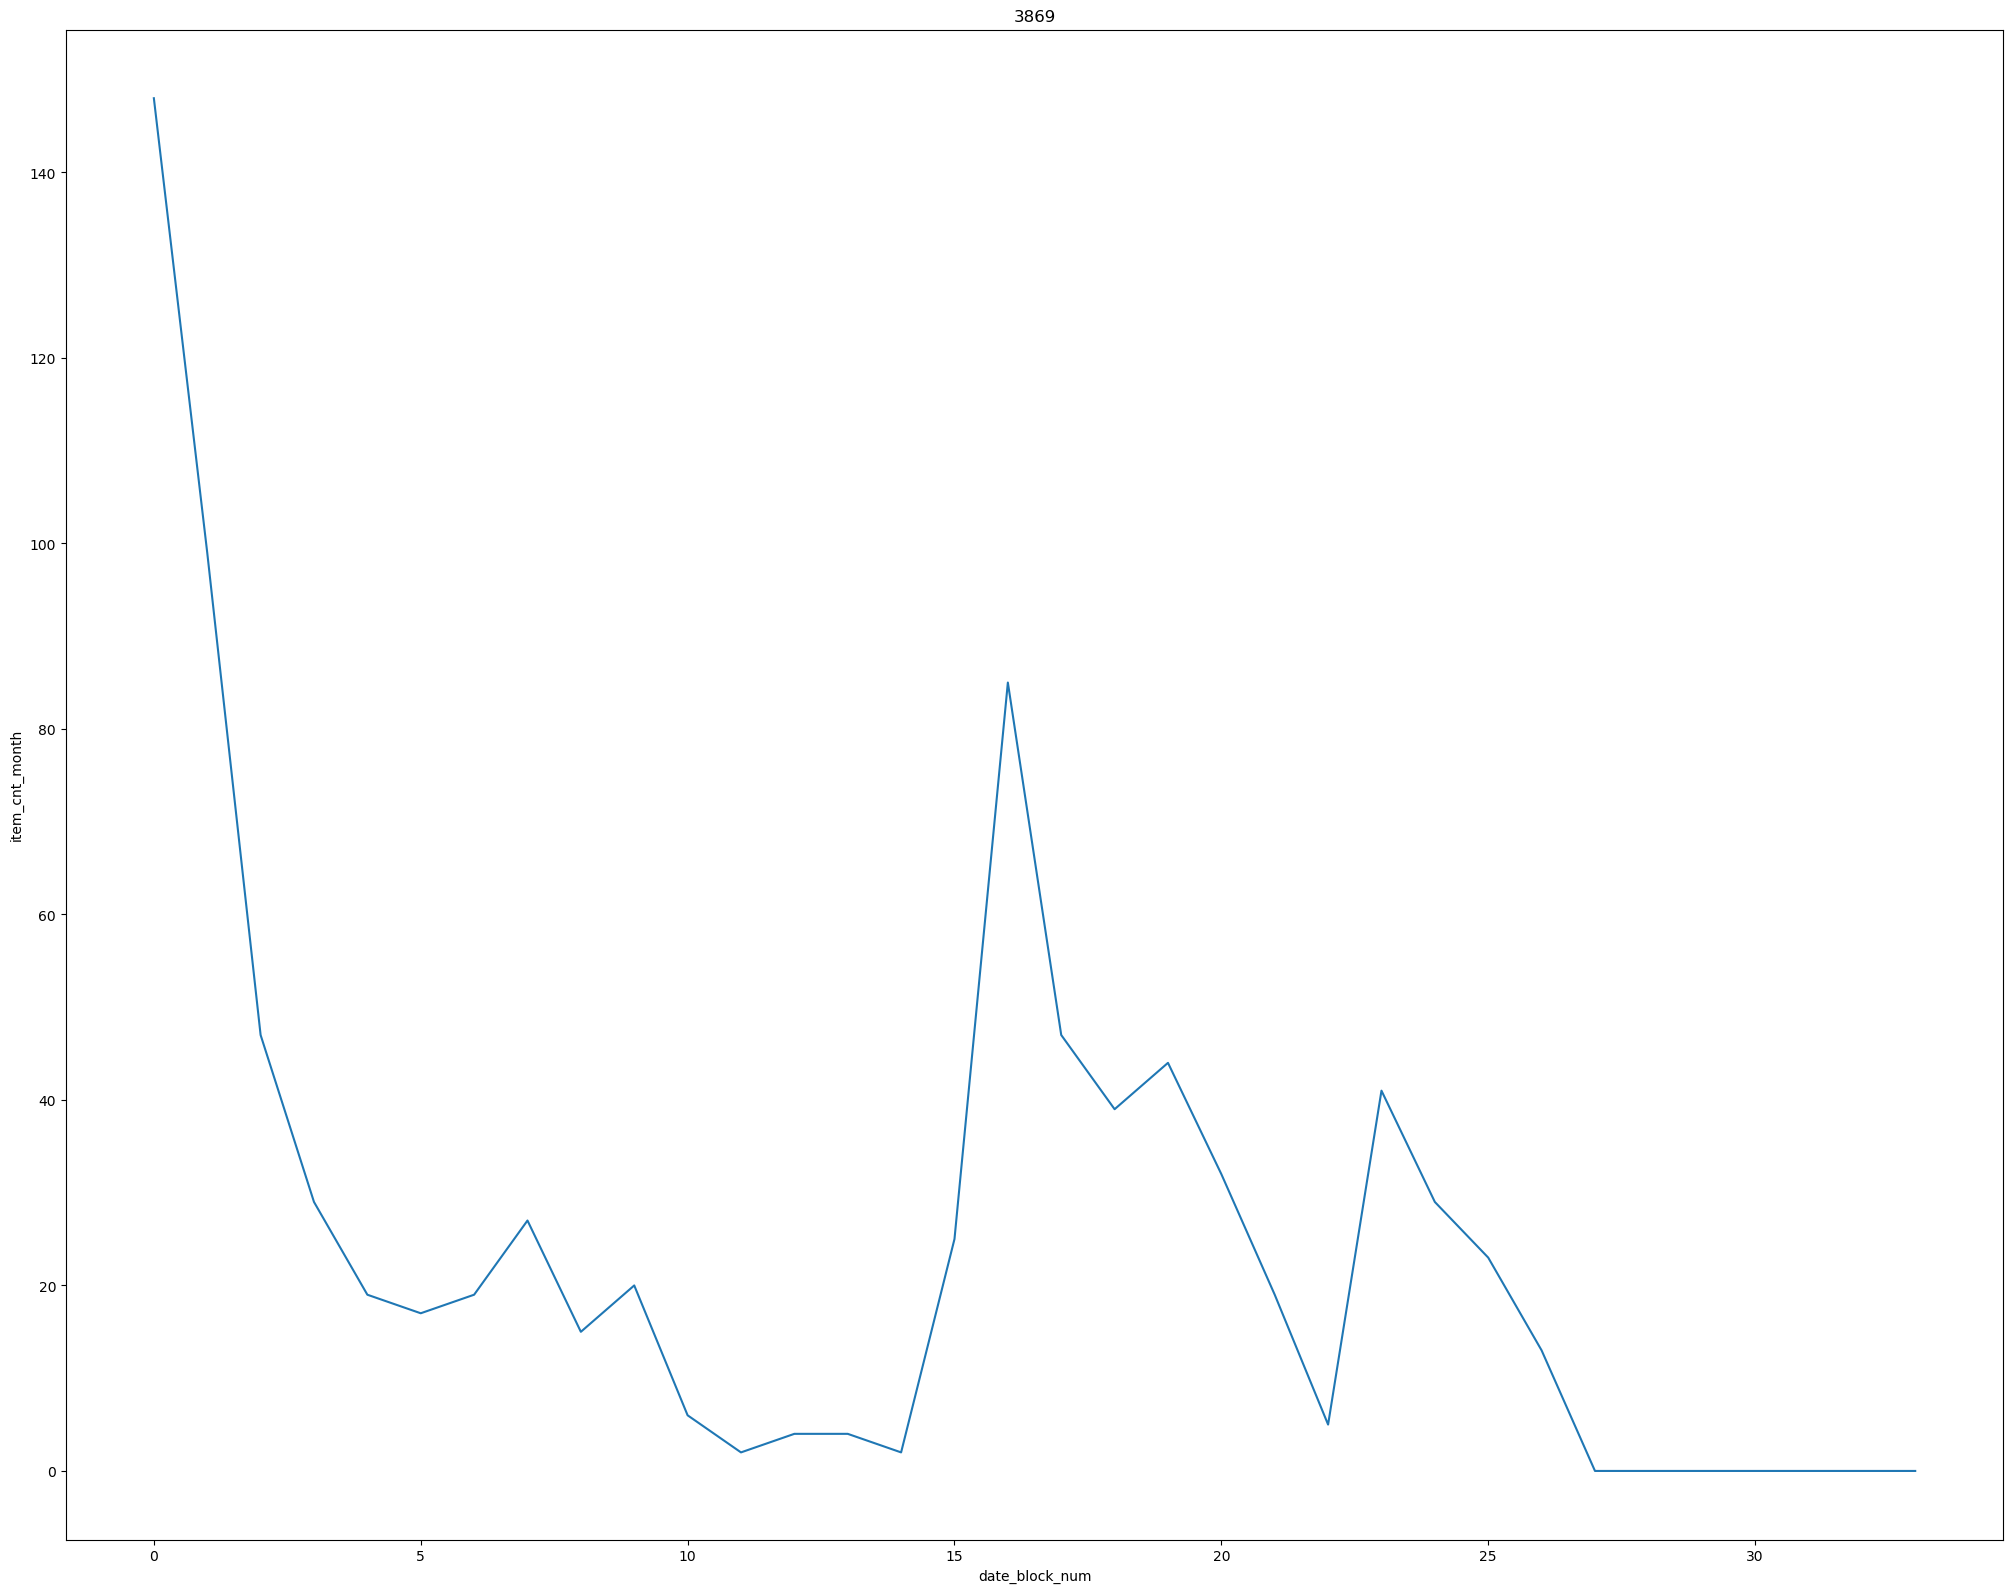

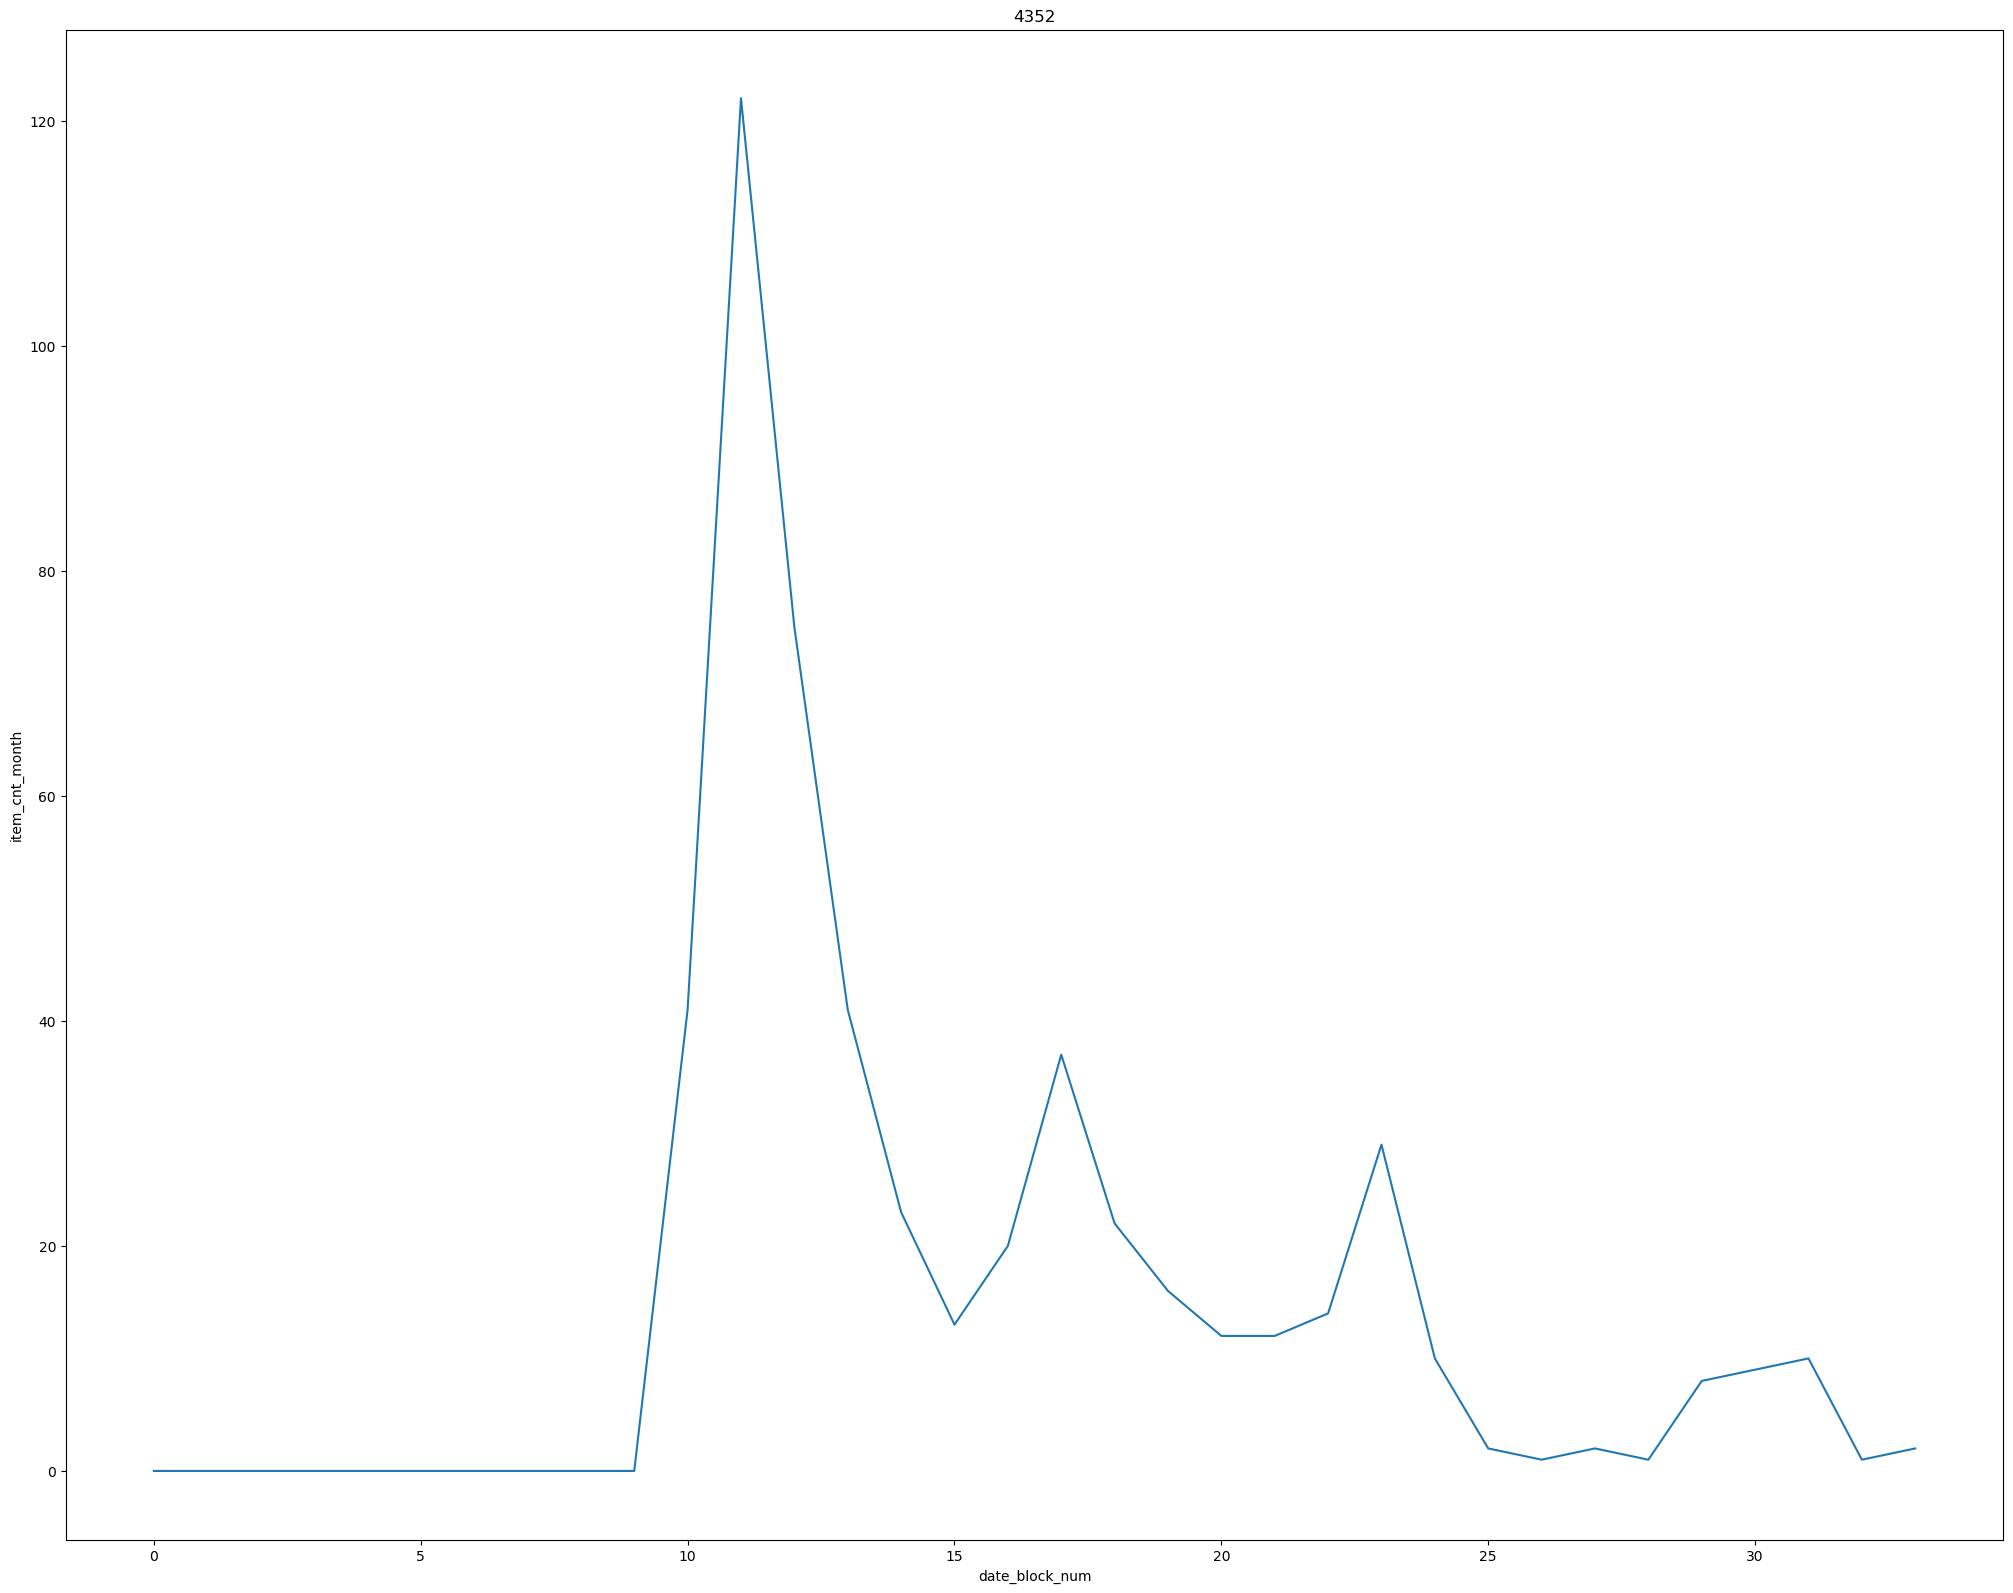

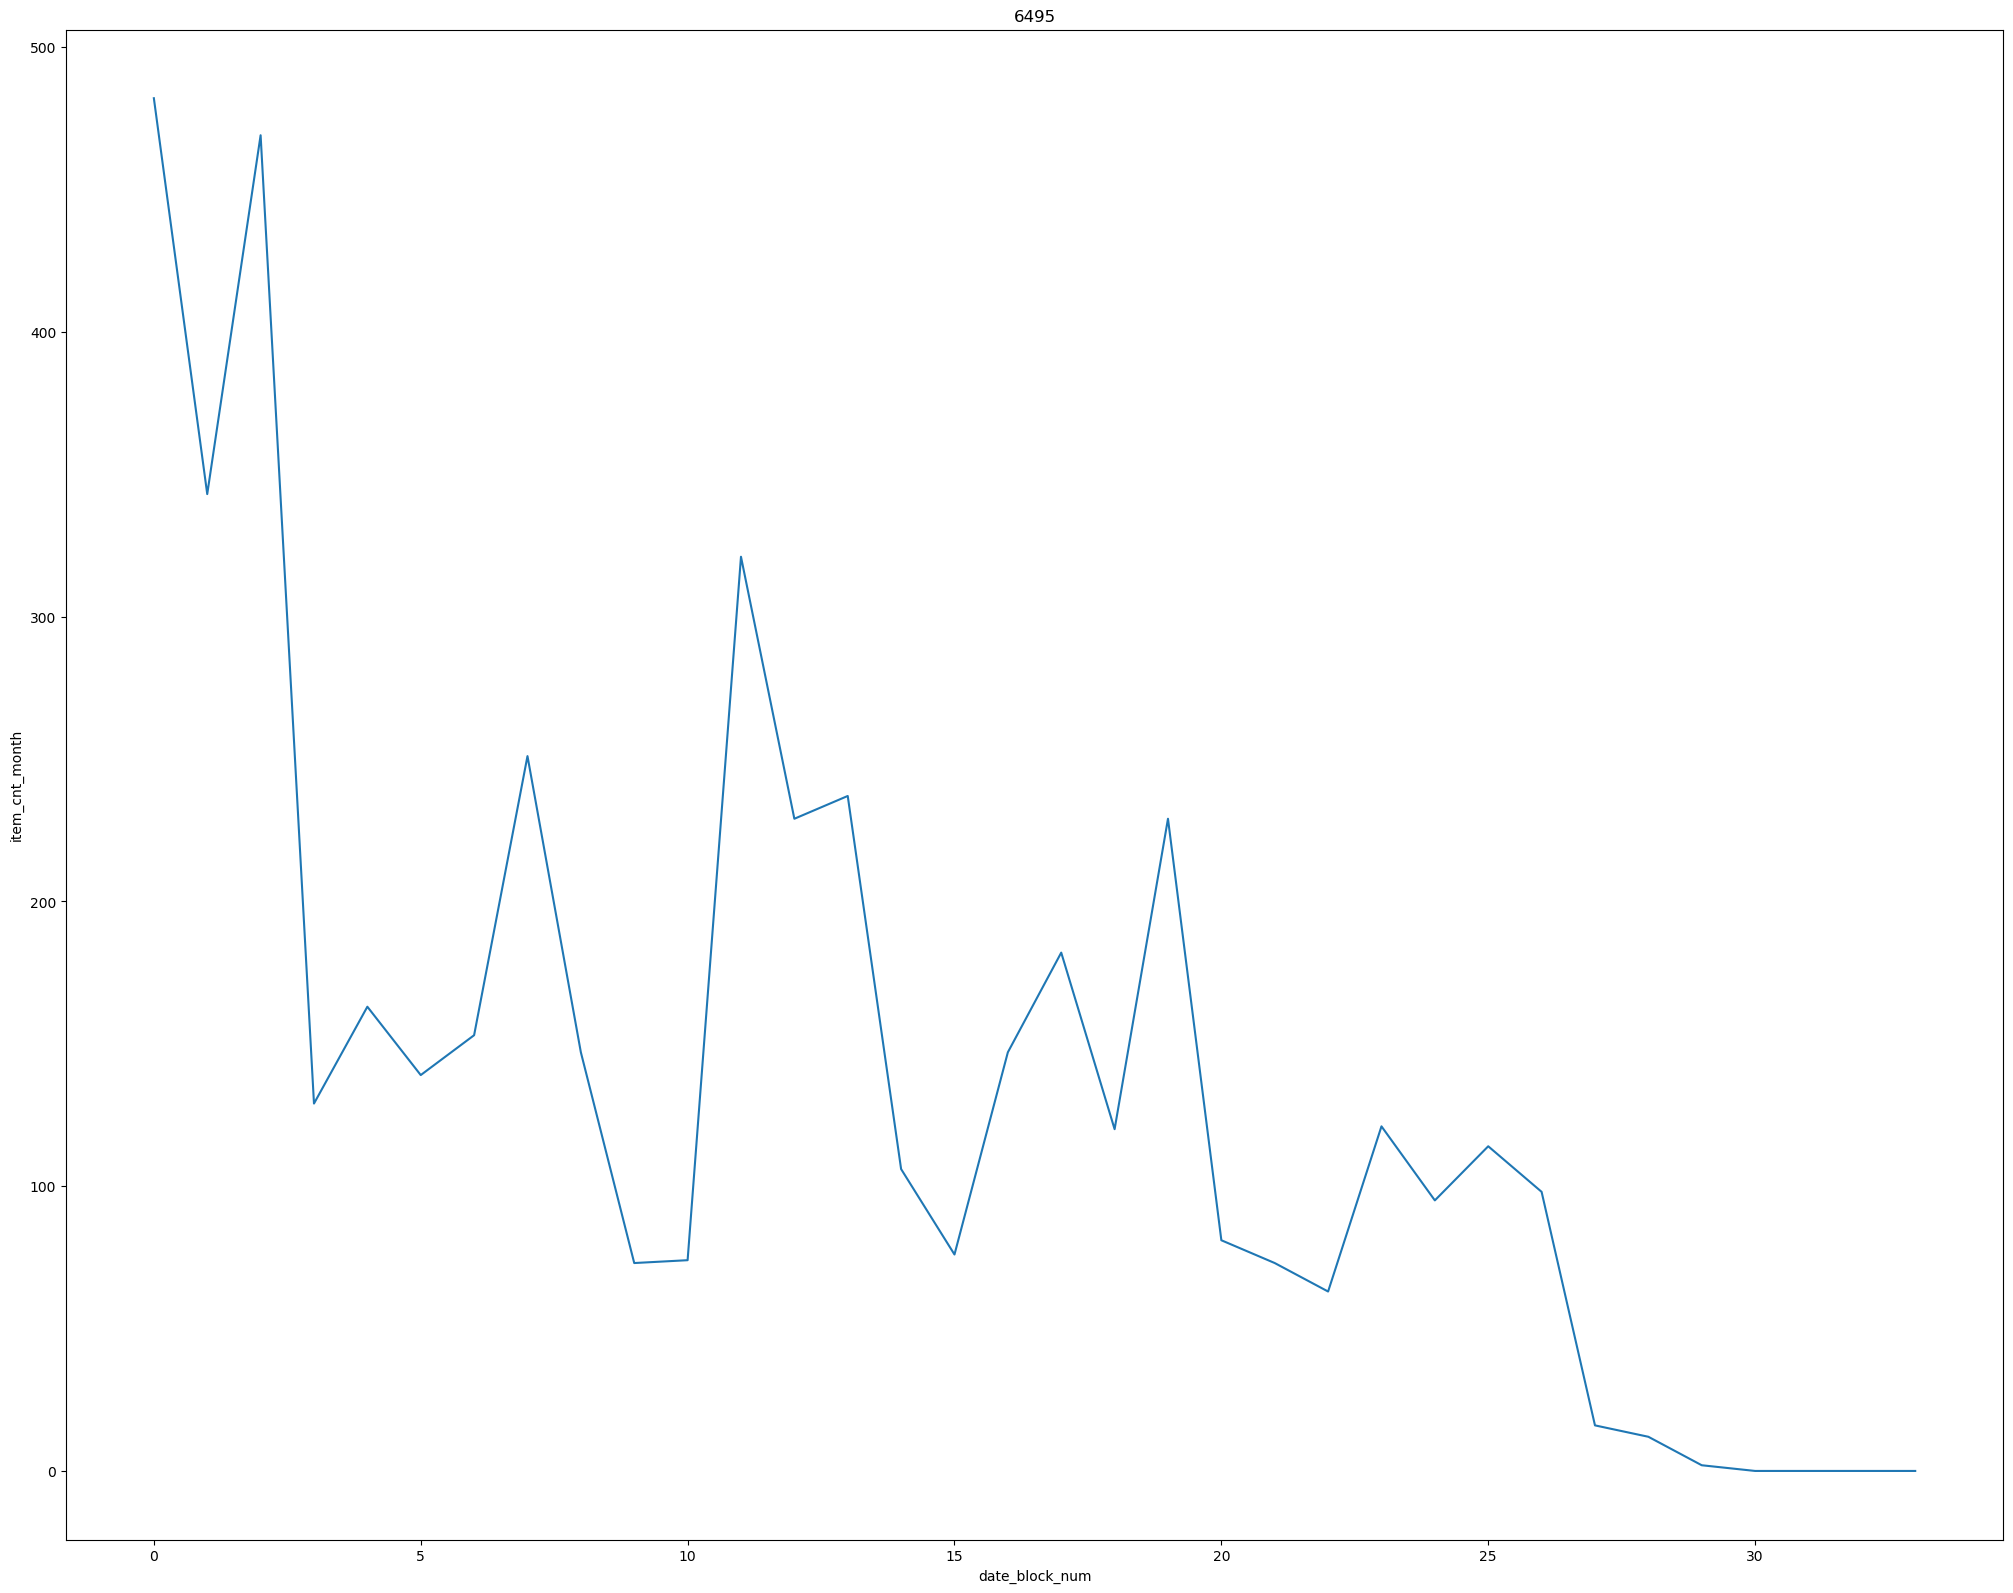

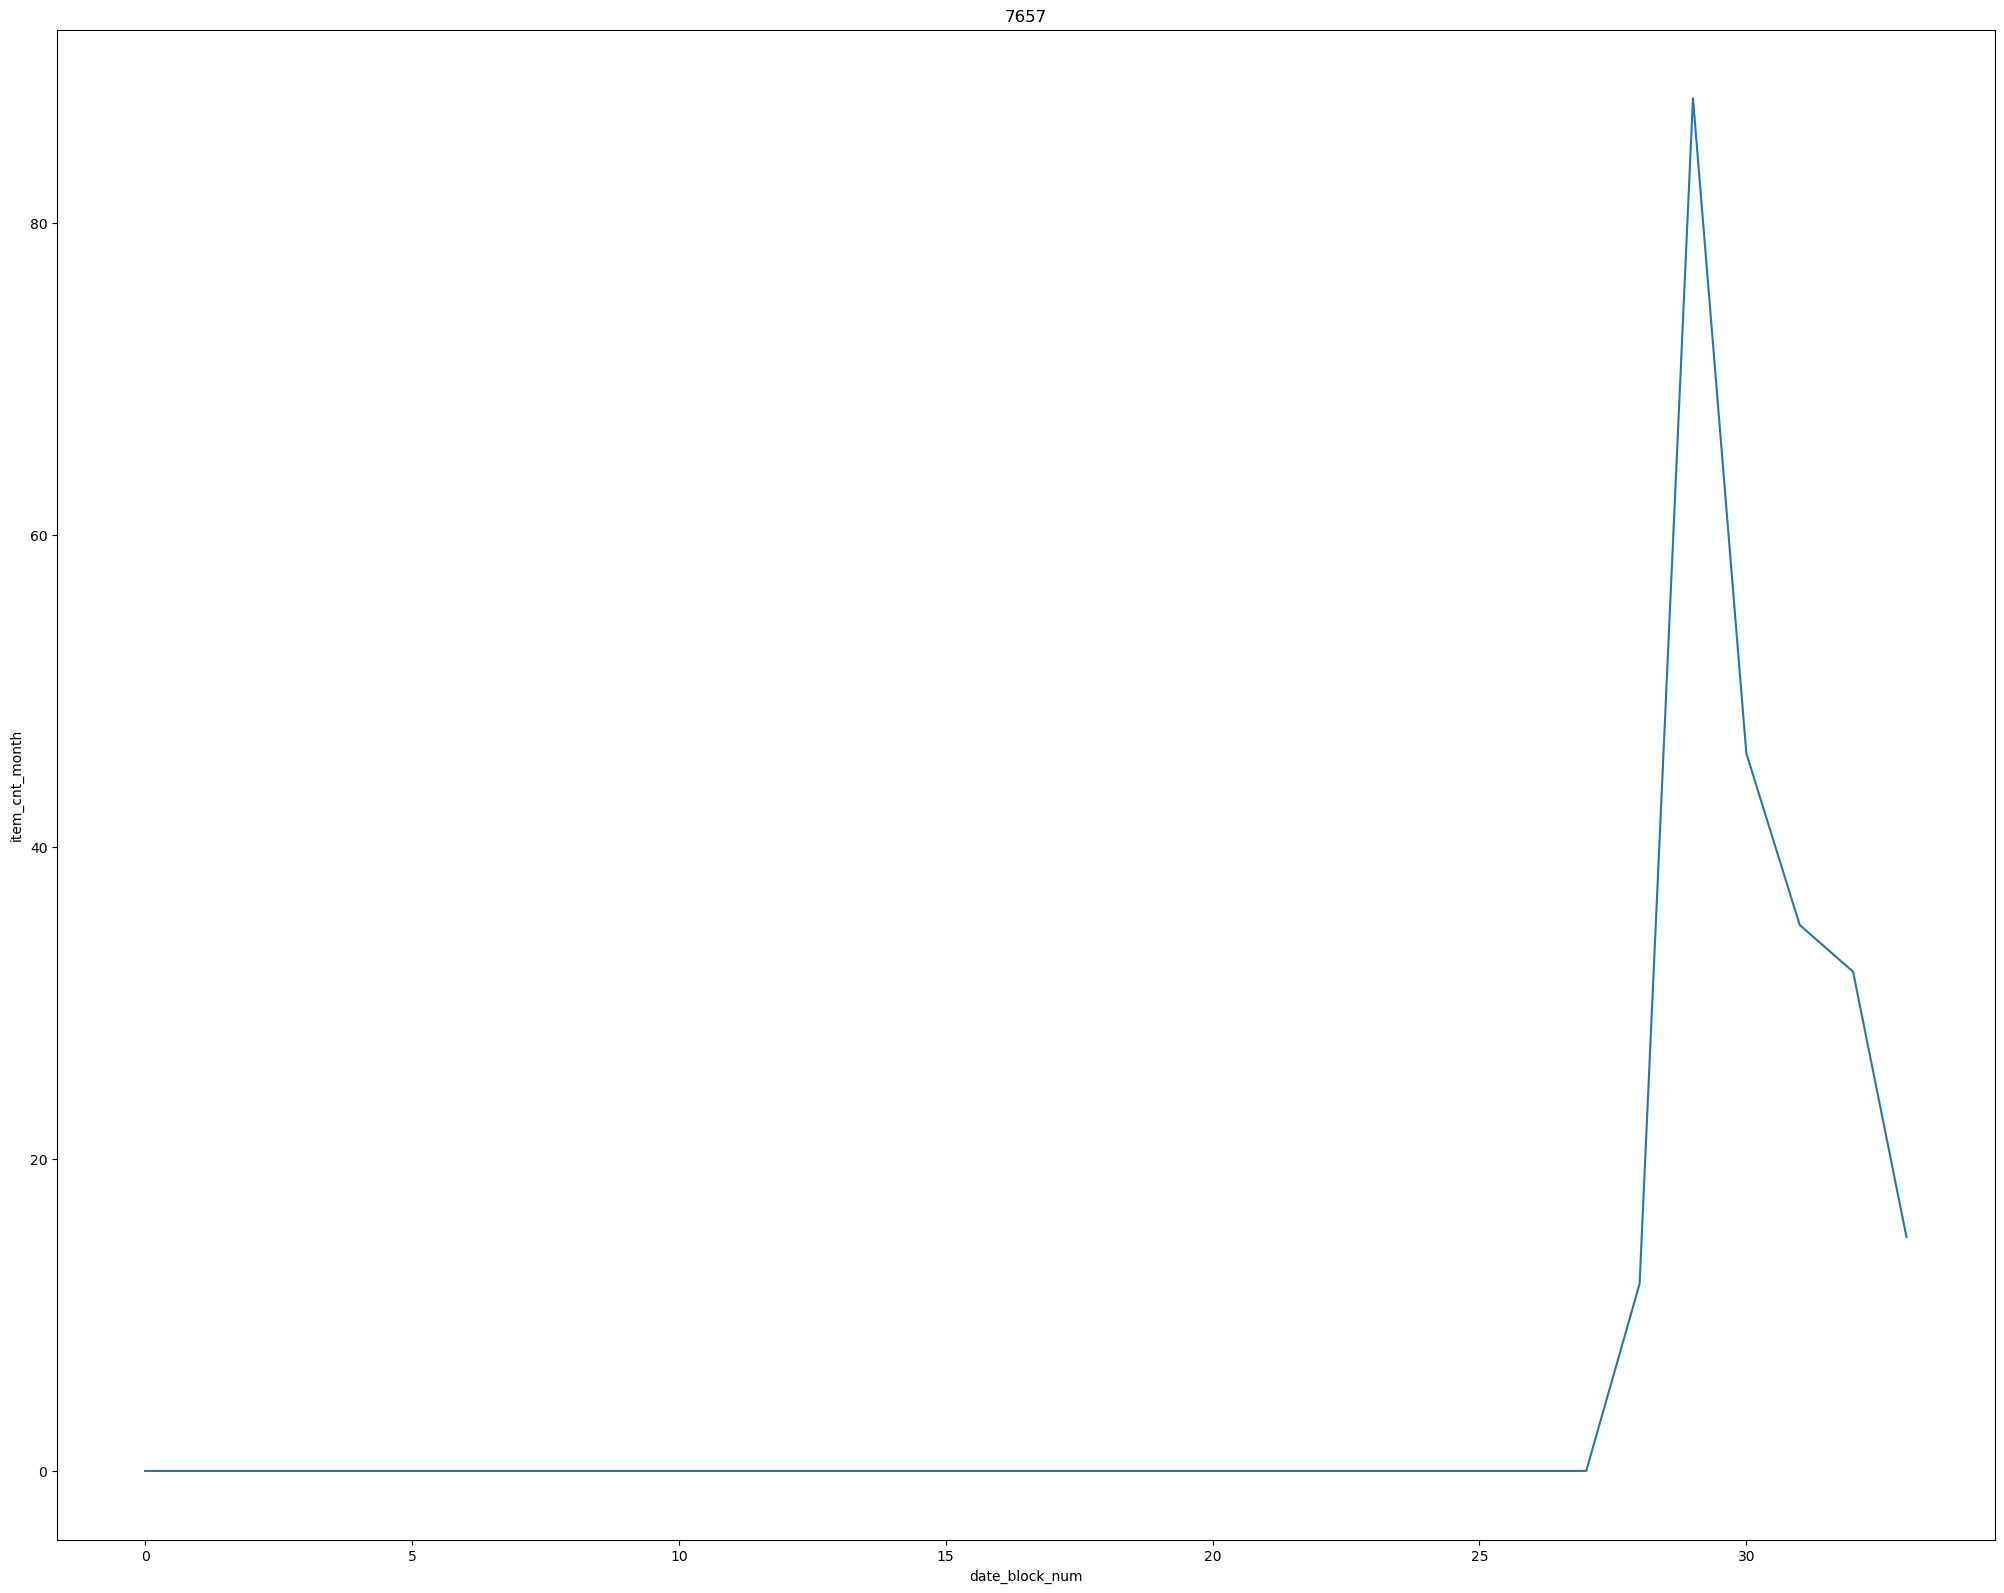

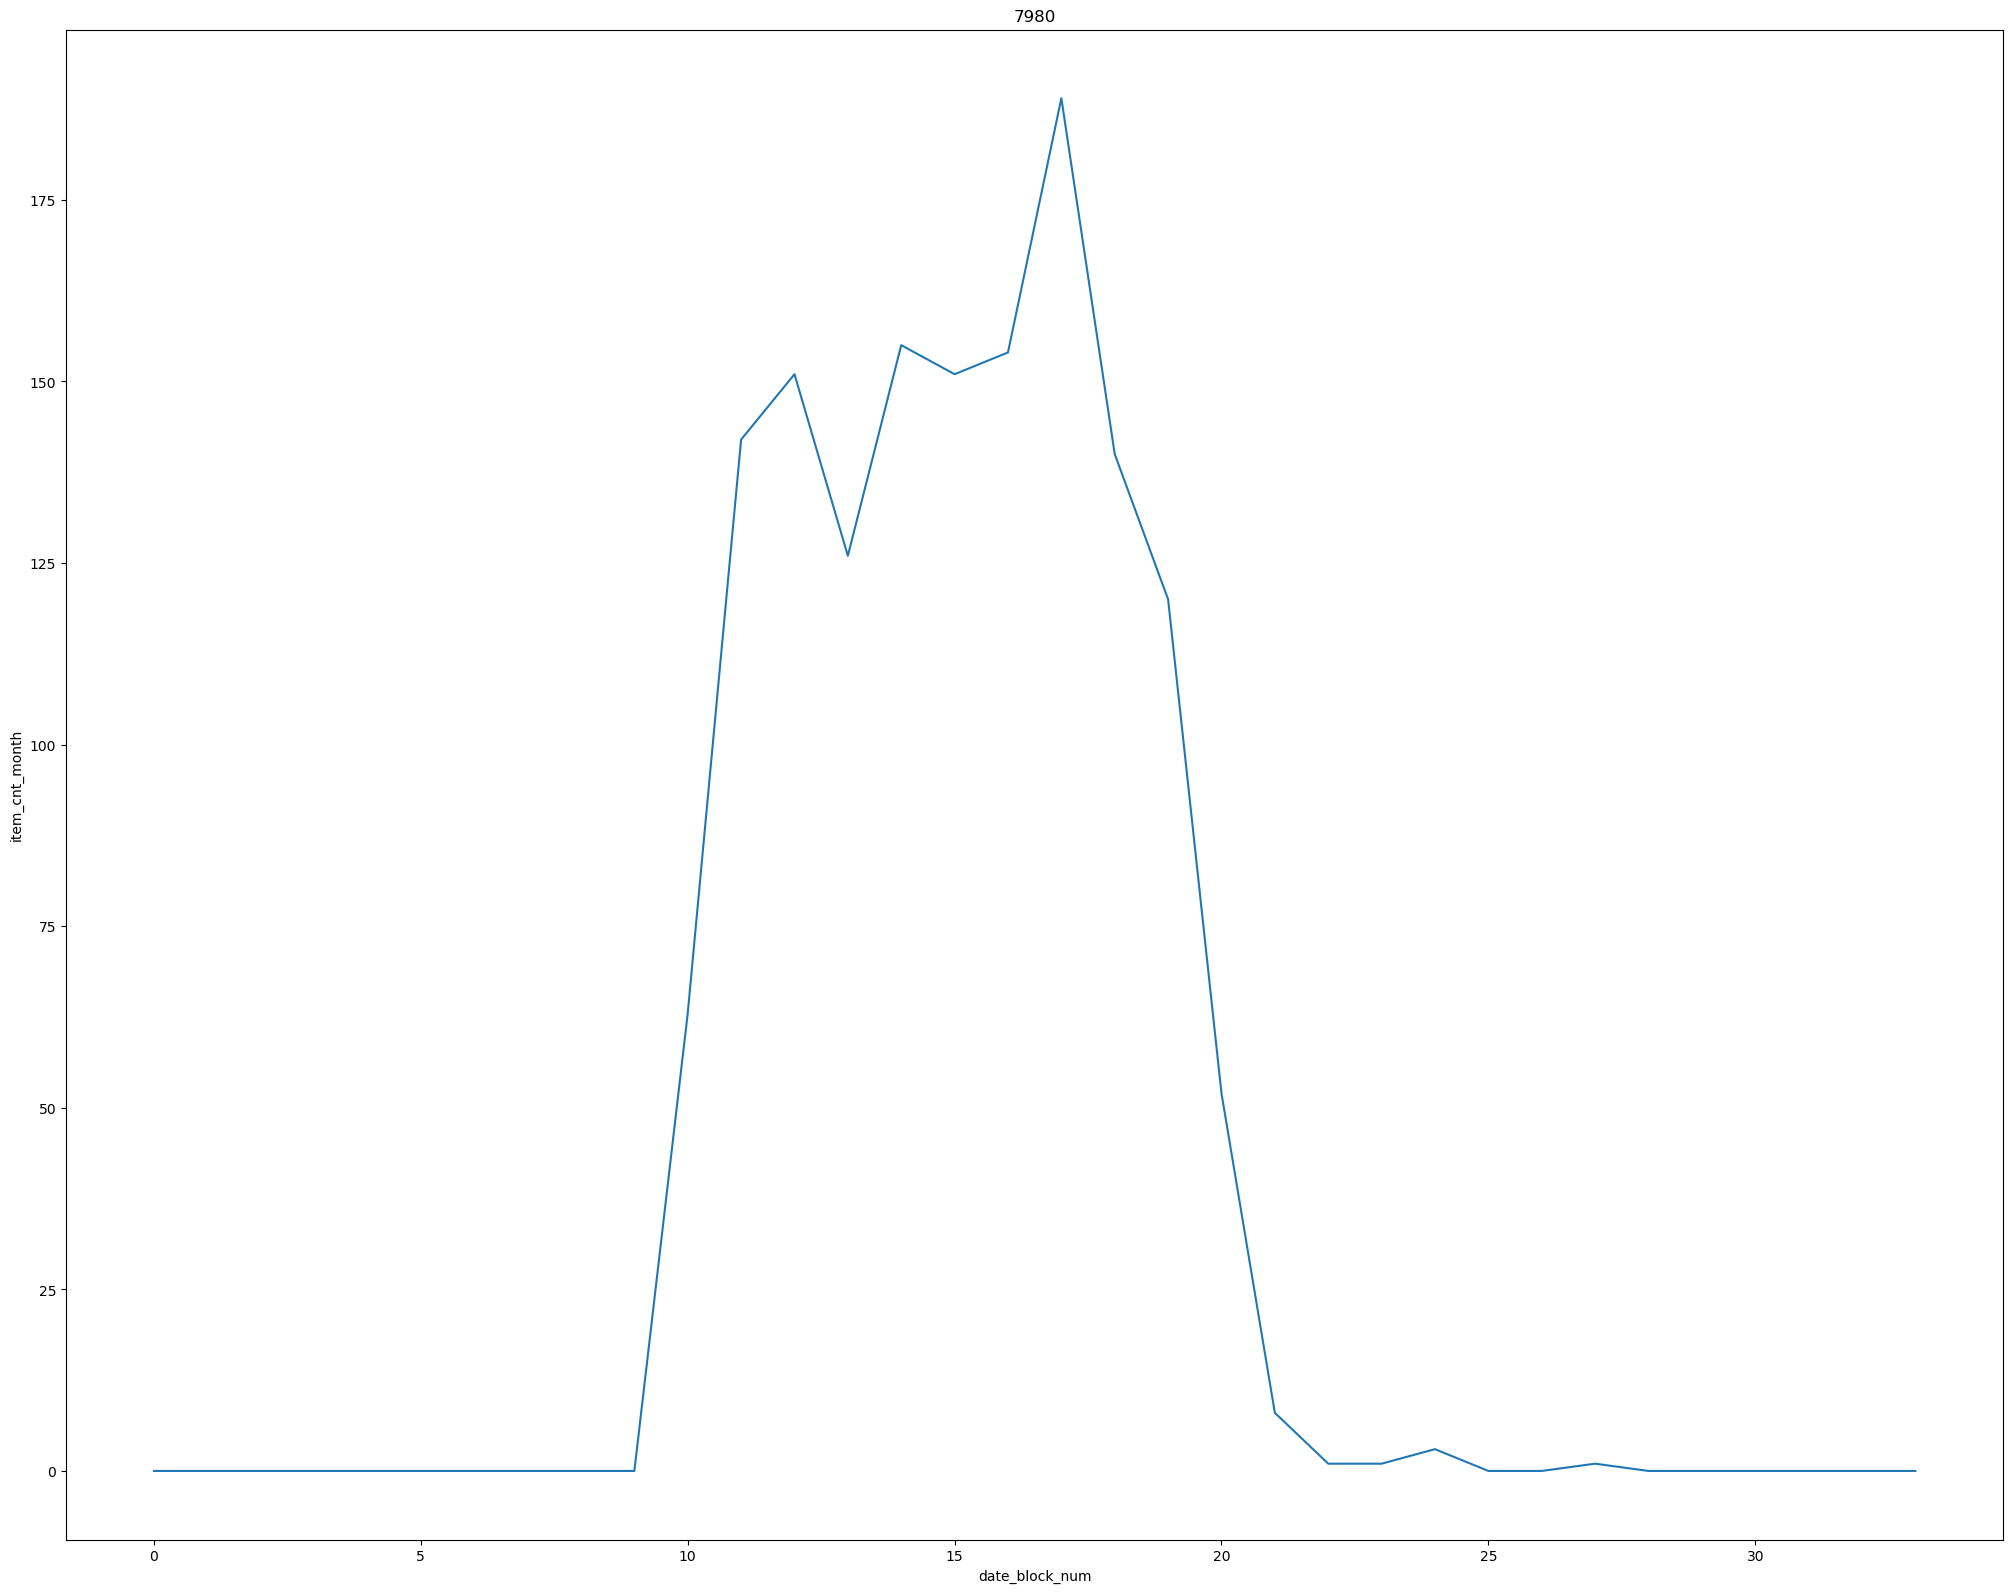

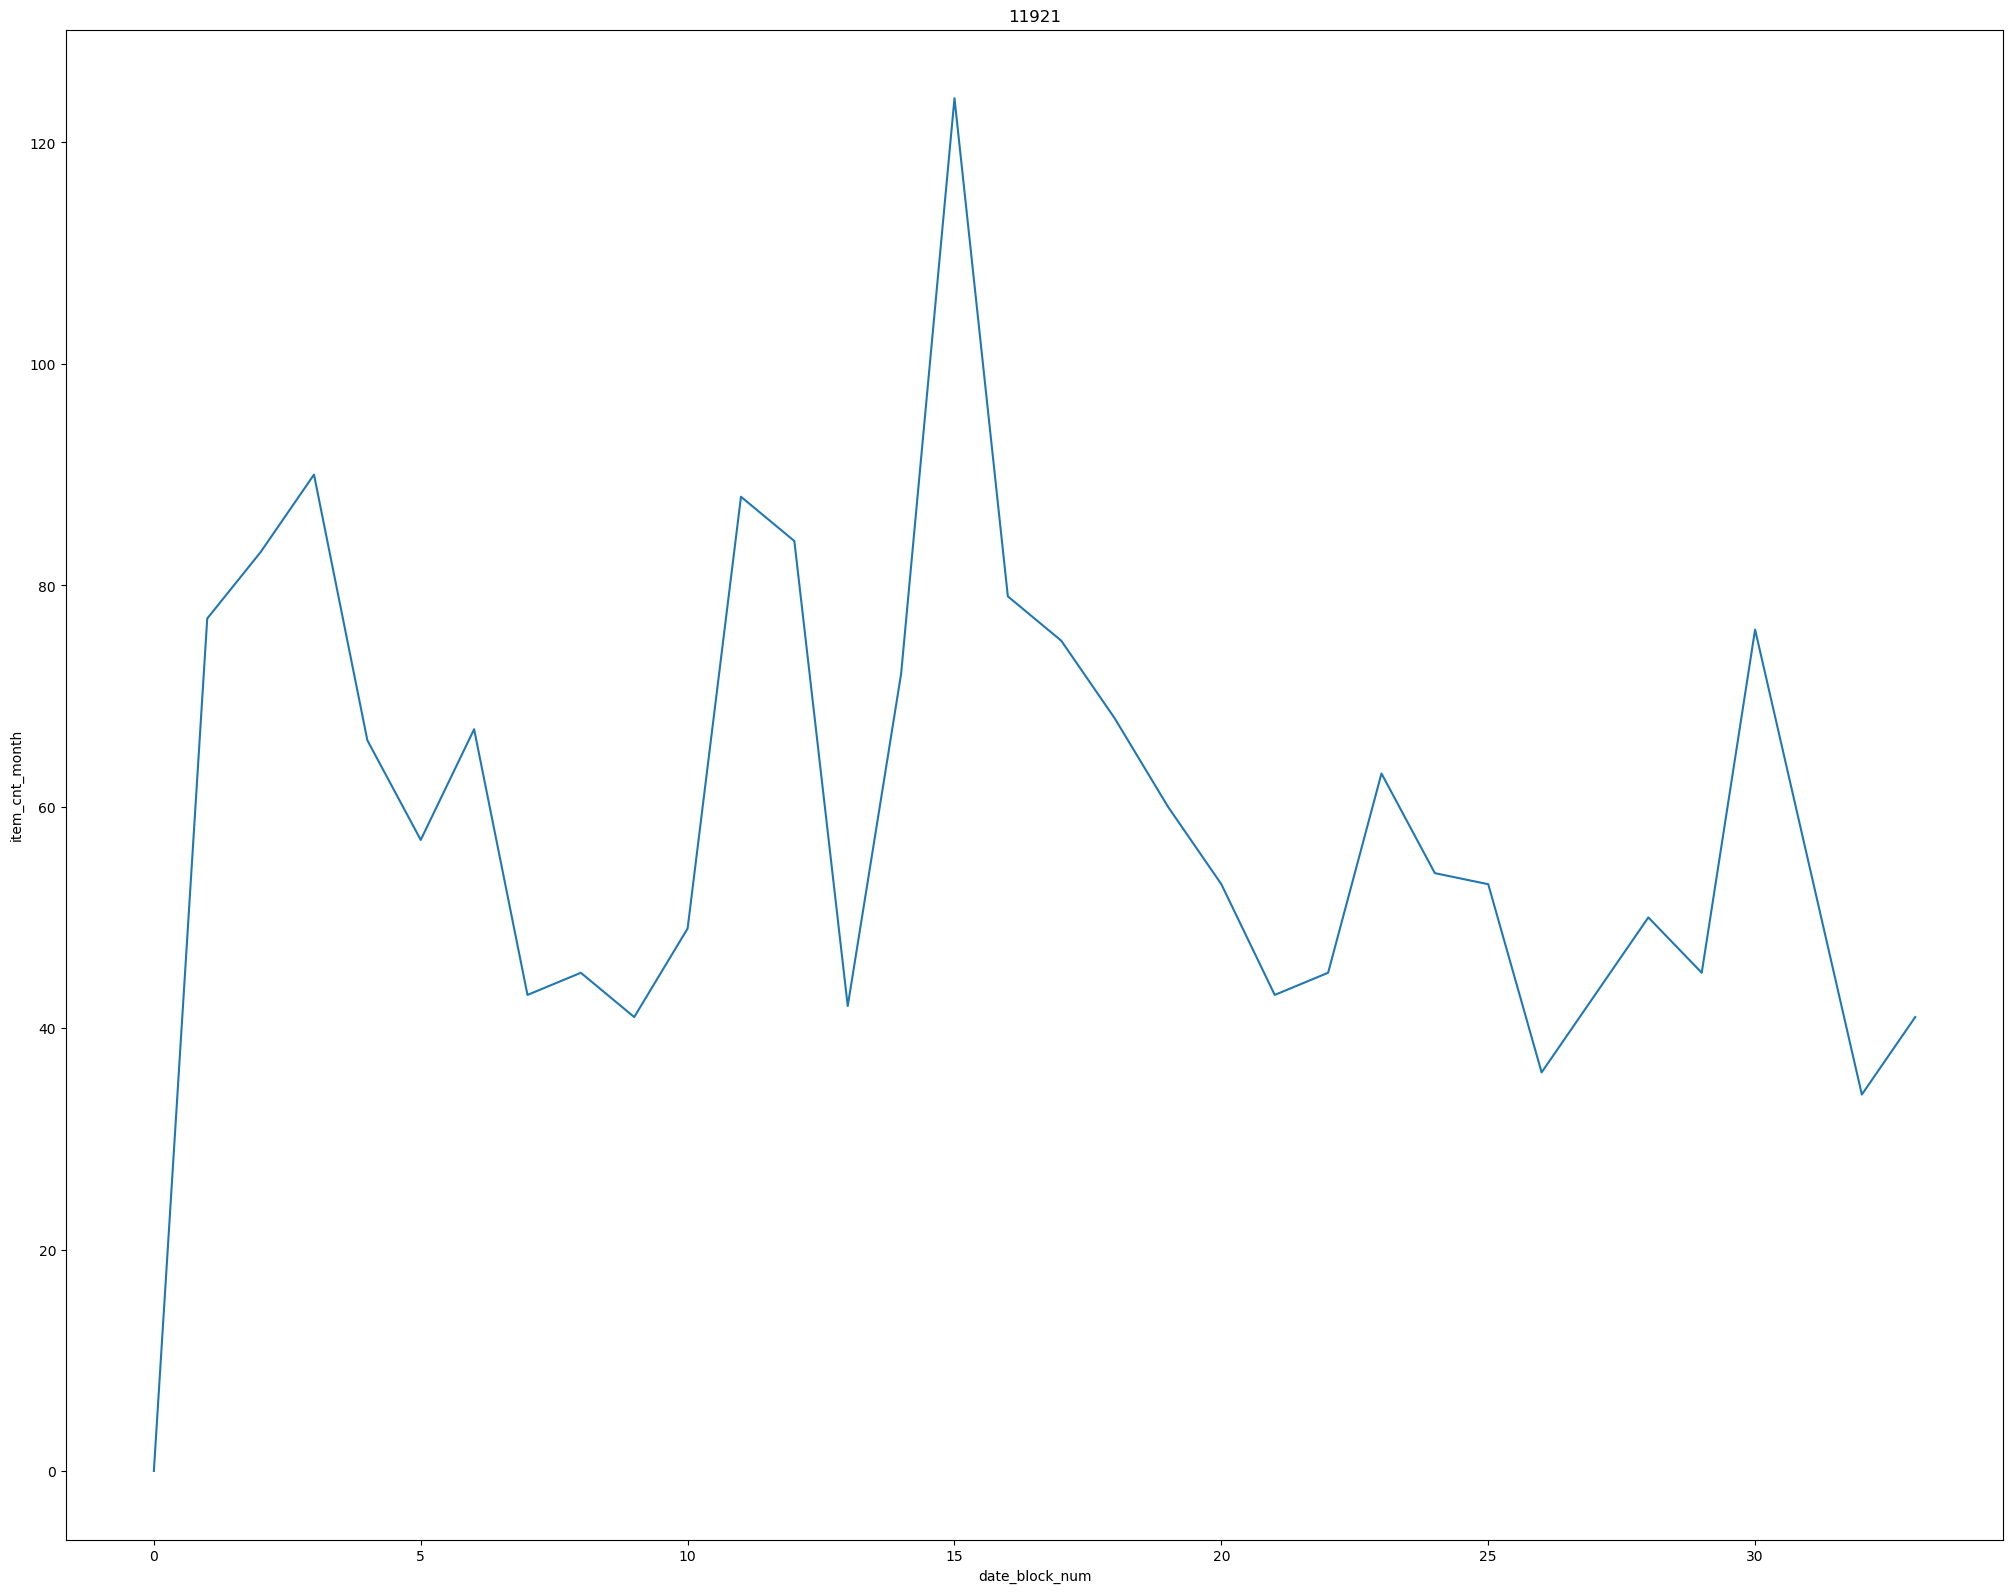

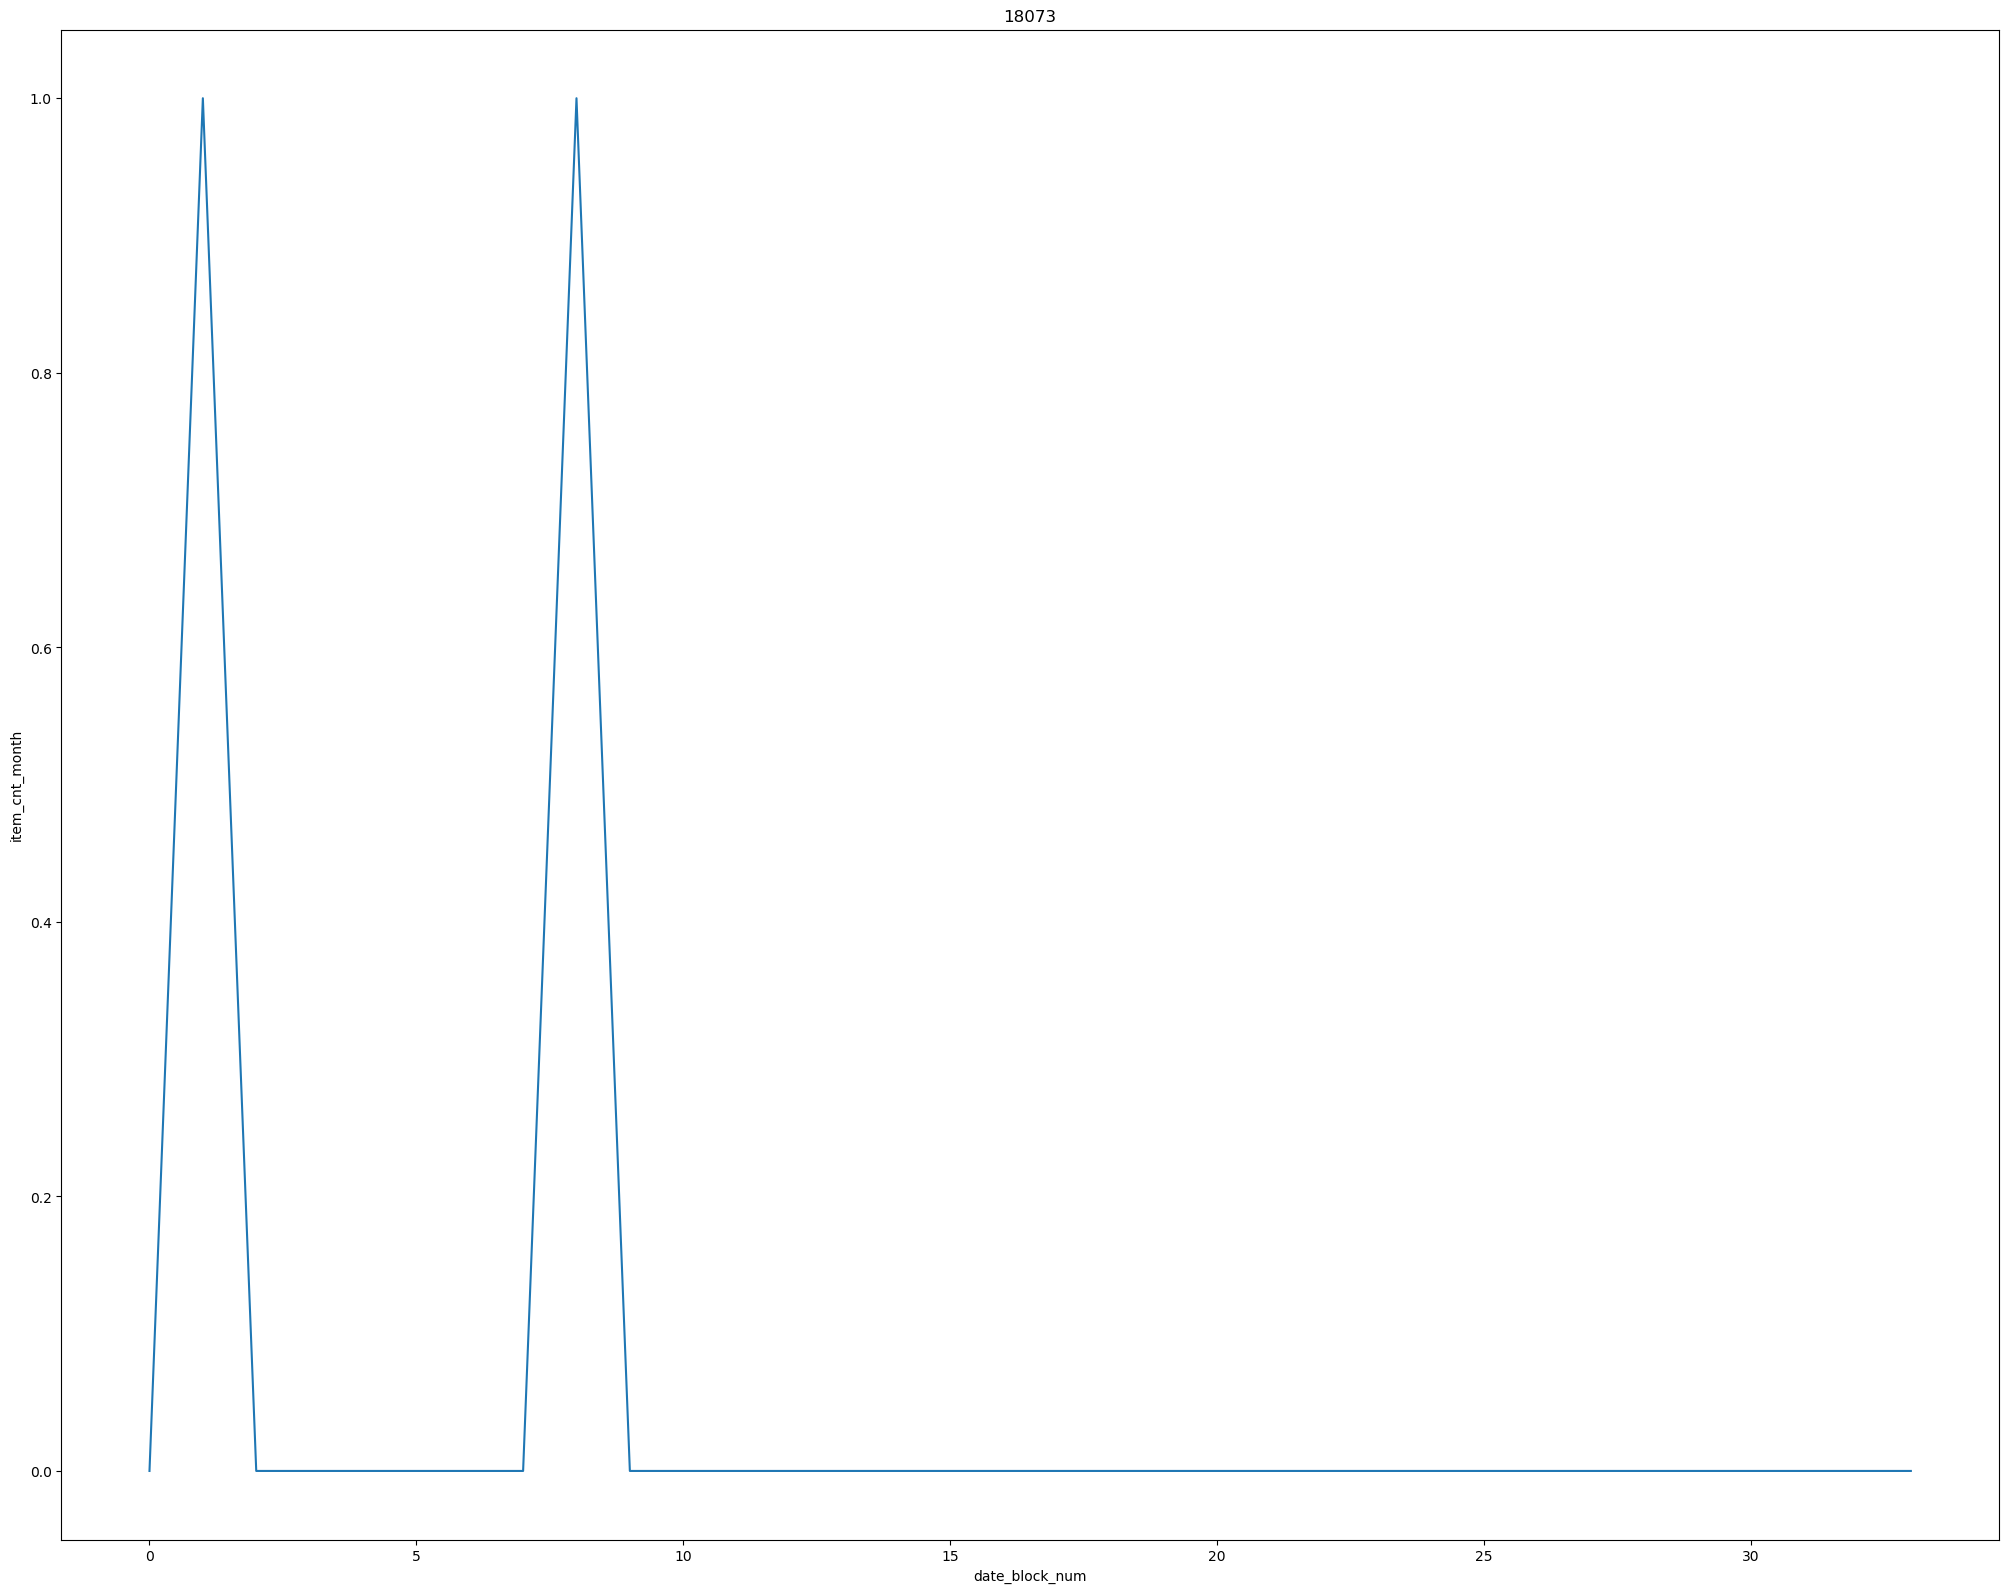

In [41]:
def main():
    for item_id in full_random_10_sale['item_id'].unique():
        df_each_item = full_random_10_sale[full_random_10_sale['item_id'] == item_id]
        plot_each_item(df_each_item, item_id)
main()

## 2. reformat原本aggregated后的monthly数据，成时间序列状。

In [42]:
sales_train_monthly1 = pd.pivot_table(sales_train_monthly, values = 'item_cnt_month', index=['shop_id','item_id'], columns = 'date_block_num').reset_index().rename_axis(None,axis=1)


In [43]:
sales_train_monthly1 = sales_train_monthly1.fillna(0) 
sales_train_monthly1

,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424120,59,22155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424121,59,22162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
424122,59,22164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0


------------------------------------Verify------------------------------------

In [44]:
sales_train_monthly1[(sales_train_monthly1['item_id'] ==5037) & (sales_train_monthly1['shop_id'] ==5)]

,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
24972,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0


## 3. 简单建模，尝试用0-32的月份的数据，去predict“33“的月份。


In [45]:
sales_train_monthly_item = sales_train_monthly1.groupby('item_id',as_index= False).sum()
sales_train_monthly_item.drop(columns = ['shop_id'],inplace = True)

In [46]:
items.shape

(22170, 3)

In [47]:
sales_train_monthly_item.shape

(21807, 35)

The number of items having sales records do not match the total number of items, so we join the two tables together and fill the null values with 0. 

In [48]:
tmp2 = pd.merge(items[['item_id']], sales_train_monthly_item,on='item_id', how='left') 

In [49]:
tmp2 = tmp2.fillna(0)

In [50]:
tmp2

,item_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22165,22165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22166,22166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,8.0,12.0,4.0,8.0,10.0,8.0,11.0,5.0,11.0
22167,22167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,...,33.0,46.0,40.0,38.0,31.0,33.0,34.0,29.0,21.0,37.0
22168,22168,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
X = tmp2.drop(columns = ['item_id',33])
y = tmp2[33].to_numpy()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
model.score(X_test,y_test)

0.08488472137688574

# Day 3

充分利用shop (shops.csv) / item (items.csv) / item_category (item_categories.csv)，三个额外数据，进行feature engineering，提取新feature。


## 1. Shop

In [57]:
shops = pd.read_csv('./data/shops.csv')

In [58]:
shops['city'] = shops['shop_name'].str.split().str[0]

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
labelencoder = LabelEncoder()
shops['city_label'] = labelencoder.fit_transform(shops['city'])

In [61]:
def containsAny(shop_name,op_types):
    for op in op_types:
        if op.upper() in str(shop_name):
            return op 
    return 'Null' 


In [62]:
op_type_list = ['мтрц','трц','трк','тц','тк']
shops['op_type']= shops['shop_name'].apply(lambda row: containsAny(row,op_type_list))

In [63]:
labelencoder1 = LabelEncoder()
shops['op_type_label'] = labelencoder1.fit_transform(shops['op_type'])

In [64]:
shops.head(10)

,shop_name,shop_id,city,city_label,op_type,op_type_label
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0,Null,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0,тц,5
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1,тц,5
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2,трк,3
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3,тц,5
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,4,трц,4
6,"Воронеж (Плехановская, 13)",6,Воронеж,5,Null,0
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,5,трц,4
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,5,трц,4
9,Выездная Торговля,9,Выездная,6,Null,0


## 2. Item

In [65]:
items = pd.read_csv('./data/items.csv')

In [66]:
items['name_s1'] = None
items['name_s2'] = items['item_name'].str.split('[').str[1]
items['name_s3'] = items['item_name'].str.split('(').str[1]
items['name_s1'] = np.where(items['name_s3'].isnull(),items['item_name'].str.split('[').str[0],items['item_name'].str.split('(').str[0])
items['name_s3'] = items['name_s3'].str.split(' ').str[0]

In [67]:
items = items.fillna('0')

## 最后用正则表达式替换掉name1/2/3中所有字母和数字变为‘ ’
[A-Za-z0-9]+   ‘ ’ 

# 不是很懂为什么要这么做？

In [68]:


#items['name_s1'] = items['name_s1'].str.replace(r'[A-Za-z0-9]+','').astype(str)
#items['name_s2'] = items['name_s2'].str.replace(r'[A-Za-z0-9]+','').astype(str)
#items['name_s3'] = items['name_s3'].str.replace(r'[A-Za-z0-9]+','').astype(str)


In [69]:
items['name1_label'] = labelencoder.fit_transform(items['name_s1'])
items['name2_label'] = labelencoder.fit_transform(items['name_s2'])
items['name3_label'] = labelencoder.fit_transform(items['name_s3'])


In [70]:
items

,item_name,item_id,item_category_id,name_s1,name_s2,name_s3,name1_label,name2_label,name3_label
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,0,ПЛАСТ.),0,5,696
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,!ABBYY FineReader 12 Professional Edition Full,"PC, Цифровая версия]",0,1,59,21
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,***В ЛУЧАХ СЛАВЫ,0,UNV),2,5,534
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,***ГОЛУБАЯ ВОЛНА,0,Univ),3,5,536
4,***КОРОБКА (СТЕКЛО) D,4,40,***КОРОБКА,0,СТЕКЛО),4,5,729
...,...,...,...,...,...,...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31,Ядерный титбит 2,"PC, Цифровая версия]",0,19519,59,21
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54,Язык запросов 1С:Предприятия,Цифровая версия],0,19520,171,21
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,Язык запросов 1С:Предприятия 8,0,+CD).,19521,5,8
22168,Яйцо для Little Inu,22168,62,Яйцо для Little Inu,0,0,19522,5,21


## 3. Item_category

In [71]:
item_categories 

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [72]:
item_categories['split'] = item_categories['item_category_name'].str.split(' - ') 

In [73]:
item_categories['type'] = item_categories['split'].str[0]
item_categories['type_label'] = labelencoder.fit_transform(item_categories['type'])

In [74]:
item_categories['subtype'] = item_categories['split'].str[-1]
item_categories['subtype_label'] = labelencoder.fit_transform(item_categories['subtype'])

In [75]:
item_categories

,item_category_name,item_category_id,split,type,type_label,subtype,subtype_label
0,PC - Гарнитуры/Наушники,0,"[PC, Гарнитуры/Наушники]",PC,0,Гарнитуры/Наушники,31
1,Аксессуары - PS2,1,"[Аксессуары, PS2]",Аксессуары,1,PS2,11
2,Аксессуары - PS3,2,"[Аксессуары, PS3]",Аксессуары,1,PS3,12
3,Аксессуары - PS4,3,"[Аксессуары, PS4]",Аксессуары,1,PS4,13
4,Аксессуары - PSP,4,"[Аксессуары, PSP]",Аксессуары,1,PSP,15
...,...,...,...,...,...,...,...
79,Служебные,79,[Служебные],Служебные,16,Служебные,56
80,Служебные - Билеты,80,"[Служебные, Билеты]",Служебные,16,Билеты,27
81,Чистые носители (шпиль),81,[Чистые носители (шпиль)],Чистые носители (шпиль),17,Чистые носители (шпиль),64
82,Чистые носители (штучные),82,[Чистые носители (штучные)],Чистые носители (штучные),18,Чистые носители (штучные),65


# Day 4 
Feature Engineering第二步，和销售数据train合并，并计算几个features。

## 1. 从train data中剔除在test data中不存在的shop id的records。

In [76]:
test_data = pd.read_csv('./data/test.csv')

In [77]:
test_data

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [78]:
sales_train_monthly = sales_train_monthly[sales_train_monthly['shop_id'].isin(test_data['shop_id'])]

In [79]:
sales_train_monthly['item_cnt_month'] = sales_train_monthly['item_cnt_month'].clip(0,20)

/Users/zz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 2. 建一个master dataframe，列名有三个date_block_num, shop_id, item_id。对每个月，对该月所有的商店和所有的商品，用笛卡尔积建一个子dataframe。所有月的子dataframe合并成最终master dataframe。
举例，假设第一月，有5个商店，80个商品，那么该月就有5*80=400行（笛卡尔积），假设总共有10个月，master dataframe就有4000行。


In [80]:
tmp = pd.MultiIndex.from_product([sales_train_monthly['date_block_num'].unique(), sales_train_monthly['shop_id'].unique(),sales_train_monthly['item_id'].unique()], names = ["date_block_num", "shop_id","item_id"])

In [81]:
master_df = pd.DataFrame(index = tmp).reset_index()

In [82]:
master_df

,date_block_num,shop_id,item_id
0,0,2,27
1,0,2,33
2,0,2,317
3,0,2,438
4,0,2,471
...,...,...,...
29995135,33,36,12733
29995136,33,36,13092
29995137,33,36,16797
29995138,33,36,18060


## 3. master dataframe left join train_agg_month table on 上面三个列，并将item_cnt_month这列填充0。 

In [83]:
sales_train_monthly = sales_train_monthly.reset_index()

In [84]:
sales_train_monthly.dtypes

index               int64
date_block_num      int64
shop_id             int64
item_id             int64
avg_item_price    float64
item_cnt_month    float64
dtype: object

In [85]:
sales_train_monthly= sales_train_monthly.drop(columns = 'index')

In [86]:
master_df.shape

(29995140, 3)

In [87]:
master_df = pd.merge(master_df,sales_train_monthly,on = ['date_block_num','shop_id','item_id'],how = 'left')


In [88]:
master_df = master_df.fillna(0)

## 4. 将test dataframe（原本只有两列）新增一列date_block_num全=34，再并入master dataframe，其余列（item_price/item_cnt_month）fillna为0。

In [89]:
test_data = test_data.drop(columns= 'ID')

In [90]:
test_data['date_block_num'] = 34

In [91]:
test_data = test_data[['date_block_num','shop_id','item_id']]

In [92]:
test_data['avg_item_price'] = 0
test_data['item_cnt_month'] = 0

In [93]:
test_data

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
0,34,5,5037,0,0
1,34,5,5320,0,0
2,34,5,5233,0,0
3,34,5,5232,0,0
4,34,5,5268,0,0
...,...,...,...,...,...
214195,34,45,18454,0,0
214196,34,45,16188,0,0
214197,34,45,15757,0,0
214198,34,45,19648,0,0


In [94]:
master_df

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
0,0,2,27,2499.0,1.0
1,0,2,33,499.0,1.0
2,0,2,317,299.0,1.0
3,0,2,438,299.0,1.0
4,0,2,471,399.0,2.0
...,...,...,...,...,...
29995135,33,36,12733,0.0,0.0
29995136,33,36,13092,0.0,0.0
29995137,33,36,16797,0.0,0.0
29995138,33,36,18060,0.0,0.0


In [95]:
master_df = pd.concat([master_df,test_data])

## 5. 将master dataframe和前面上个任务作出的三个feature table作left join并入，key分别是shop_id，item_id, item_category_id。


In [96]:
shops.head()

,shop_name,shop_id,city,city_label,op_type,op_type_label
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0,Null,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0,тц,5
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1,тц,5
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2,трк,3
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3,тц,5


In [97]:
shops['name_label'] = labelencoder.fit_transform(shops['shop_name'])

In [98]:
shops_fe = shops.drop(columns = ['shop_name','city','op_type'])

In [99]:
shops_fe.head()

,shop_id,city_label,op_type_label,name_label
0,0,0,0,0
1,1,0,5,1
2,2,1,5,2
3,3,2,3,3
4,4,3,5,4


In [100]:
items_fe = items[['item_id','item_category_id','name1_label','name2_label','name3_label']]
items_fe.head()

,item_id,item_category_id,name1_label,name2_label,name3_label
0,0,40,0,5,696
1,1,76,1,59,21
2,2,40,2,5,534
3,3,40,3,5,536
4,4,40,4,5,729


In [101]:
item_categories_fe = item_categories[['item_category_id','type_label','subtype_label']]

In [102]:
item_categories_fe.head()

,item_category_id,type_label,subtype_label
0,0,0,31
1,1,1,11
2,2,1,12
3,3,1,13
4,4,1,15


In [103]:
master_df = master_df.merge(shops_fe,on = 'shop_id',how  = 'left')

In [104]:
master_df= master_df.merge(items_fe,on = 'item_id', how = 'left')

In [105]:
master_df = master_df.merge(item_categories_fe,on = 'item_category_id', how = 'left')

In [106]:
master_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'avg_item_price',
       'item_cnt_month', 'city_label', 'op_type_label', 'name_label',
       'item_category_id', 'name1_label', 'name2_label', 'name3_label',
       'type_label', 'subtype_label'],
      dtype='object')

## 6. 新5个feature：
对于master每一行，计算
- 该商品上一个月的平均销量
- 该商品所在的商店，上一个月的平均销量
- 该商品所在商店的name1类，上一个月平均销量
- 该商品所在商店的item_category_id，上一个月平均销量
- 该商品所在商店的城市，上一个月平均销量
 

### 该商品上一个月的平均销量   (总销量？）
 

In [107]:
master_df

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_label,op_type_label,name_label,item_category_id,name1_label,name2_label,name3_label,type_label,subtype_label
0,0,2,27,2499.0,1.0,1,5,2,19,27,84,21,5,12
1,0,2,33,499.0,1.0,1,5,2,37,31,5,312,11,1
2,0,2,317,299.0,1.0,1,5,2,45,295,5,369,12,25
3,0,2,438,299.0,1.0,1,5,2,45,410,5,369,12,25
4,0,2,471,399.0,2.0,1,5,2,49,442,5,884,12,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209335,34,45,18454,0.0,0.0,21,5,45,55,16184,5,21,13,4
30209336,34,45,16188,0.0,0.0,21,5,45,64,14142,5,21,14,44
30209337,34,45,15757,0.0,0.0,21,5,45,55,13733,5,21,13,4
30209338,34,45,19648,0.0,0.0,21,5,45,40,17229,5,717,11,6


In [108]:
last_month = master_df.groupby(['date_block_num','item_id'])['item_cnt_month'].sum().reset_index()

In [109]:
last_month['date_block_num'] = last_month['date_block_num']-1

In [110]:
last_month.columns = ['date_block_num','item_id','last_month_sales']

In [111]:
master_df = master_df.merge(last_month, on = ['date_block_num','item_id'],how = 'left')

In [112]:
master_df.rename(columns = {'last_month_sales':'item_last_month_sales'},inplace = True)  
master_df

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_label,op_type_label,name_label,item_category_id,name1_label,name2_label,name3_label,type_label,subtype_label,item_last_month_sales
0,0,2,27,2499.0,1.0,1,5,2,19,27,84,21,5,12,3.0
1,0,2,33,499.0,1.0,1,5,2,37,31,5,312,11,1,29.0
2,0,2,317,299.0,1.0,1,5,2,45,295,5,369,12,25,2.0
3,0,2,438,299.0,1.0,1,5,2,45,410,5,369,12,25,2.0
4,0,2,471,399.0,2.0,1,5,2,49,442,5,884,12,41,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209335,34,45,18454,0.0,0.0,21,5,45,55,16184,5,21,13,4,NaN
30209336,34,45,16188,0.0,0.0,21,5,45,64,14142,5,21,14,44,NaN
30209337,34,45,15757,0.0,0.0,21,5,45,55,13733,5,21,13,4,NaN
30209338,34,45,19648,0.0,0.0,21,5,45,40,17229,5,717,11,6,NaN


### 该商品所在的商店，上一个月的平均销量
 

In [113]:
last_month_store = master_df.groupby(['date_block_num','shop_id'])['item_cnt_month'].sum().reset_index()
last_month_store

,date_block_num,shop_id,item_cnt_month
0,0,2,1146.0
1,0,3,767.0
2,0,4,2089.0
3,0,5,0.0
4,0,6,3561.0
...,...,...,...
1465,34,55,0.0
1466,34,56,0.0
1467,34,57,0.0
1468,34,58,0.0


In [114]:
last_month_store['date_block_num'] = last_month_store['date_block_num']-1

In [115]:
last_month_store.columns = ['date_block_num','shop_id','shop_last_month_sales']

In [116]:
master_df = master_df.merge(last_month_store, on = ['date_block_num','shop_id'],how = 'left')

In [117]:
master_df

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_label,op_type_label,name_label,item_category_id,name1_label,name2_label,name3_label,type_label,subtype_label,item_last_month_sales,shop_last_month_sales
0,0,2,27,2499.0,1.0,1,5,2,19,27,84,21,5,12,3.0,489.0
1,0,2,33,499.0,1.0,1,5,2,37,31,5,312,11,1,29.0,489.0
2,0,2,317,299.0,1.0,1,5,2,45,295,5,369,12,25,2.0,489.0
3,0,2,438,299.0,1.0,1,5,2,45,410,5,369,12,25,2.0,489.0
4,0,2,471,399.0,2.0,1,5,2,49,442,5,884,12,41,43.0,489.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209335,34,45,18454,0.0,0.0,21,5,45,55,16184,5,21,13,4,NaN,NaN
30209336,34,45,16188,0.0,0.0,21,5,45,64,14142,5,21,14,44,NaN,NaN
30209337,34,45,15757,0.0,0.0,21,5,45,55,13733,5,21,13,4,NaN,NaN
30209338,34,45,19648,0.0,0.0,21,5,45,40,17229,5,717,11,6,NaN,NaN


### 该商品所在商店的name1类，上一个月平均销量


In [118]:
last_month_name1 = master_df.groupby(['date_block_num','name1_label'])['item_cnt_month'].sum().reset_index()
last_month_name1['date_block_num'] = last_month_name1['date_block_num']-1
last_month_name1.columns = ['date_block_num','name1_label','name1_last_month_sales']
master_df = master_df.merge(last_month_name1, on = ['date_block_num','name1_label'],how = 'left')

### 该商品所在商店的item_category_id，上一个月平均销量


In [119]:
last_month_item_category = master_df.groupby(['date_block_num','item_category_id'])['item_cnt_month'].sum().reset_index()
last_month_item_category['date_block_num'] = last_month_item_category['date_block_num']-1
last_month_item_category.columns = ['date_block_num','item_category_id','category_last_month_sales']
master_df = master_df.merge(last_month_item_category, on = ['date_block_num','item_category_id'],how = 'left')

### 该商品所在商店的城市，上一个月平均销量


In [120]:
last_month_item_city = master_df.groupby(['date_block_num','city_label'])['item_cnt_month'].sum().reset_index()
last_month_item_city['date_block_num'] = last_month_item_city['date_block_num']-1
last_month_item_city.columns = ['date_block_num','city_label','city_last_month_sales']
master_df = master_df.merge(last_month_item_city, on = ['date_block_num','city_label'],how = 'left')

In [121]:
master_df = master_df.fillna(0)
master_df['item_last_month_sales'] = master_df['item_last_month_sales'].astype('int')
master_df['shop_last_month_sales'] = master_df['shop_last_month_sales'].astype('int')
master_df['name1_last_month_sales'] = master_df['name1_last_month_sales'].astype('int')
master_df['category_last_month_sales'] = master_df['category_last_month_sales'].astype('int')
master_df['city_last_month_sales'] = master_df['city_last_month_sales'].astype('int')


In [122]:
master_df

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_label,op_type_label,name_label,item_category_id,name1_label,name2_label,name3_label,type_label,subtype_label,item_last_month_sales,shop_last_month_sales,name1_last_month_sales,category_last_month_sales,city_last_month_sales
0,0,2,27,2499.0,1.0,1,5,2,19,27,84,21,5,12,3,489,10,7247,489
1,0,2,33,499.0,1.0,1,5,2,37,31,5,312,11,1,29,489,29,4348,489
2,0,2,317,299.0,1.0,1,5,2,45,295,5,369,12,25,2,489,2,233,489
3,0,2,438,299.0,1.0,1,5,2,45,410,5,369,12,25,2,489,2,233,489
4,0,2,471,399.0,2.0,1,5,2,49,442,5,884,12,41,43,489,43,889,489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209335,34,45,18454,0.0,0.0,21,5,45,55,16184,5,21,13,4,0,0,0,0,0
30209336,34,45,16188,0.0,0.0,21,5,45,64,14142,5,21,14,44,0,0,0,0,0
30209337,34,45,15757,0.0,0.0,21,5,45,55,13733,5,21,13,4,0,0,0,0,0
30209338,34,45,19648,0.0,0.0,21,5,45,40,17229,5,717,11,6,0,0,0,0,0


In [123]:
master_df['item_cnt_month'].unique()

array([ 1.,  2.,  3.,  4.,  6.,  5., 17.,  8.,  9., 10.,  7.,  0., 11.,
       12., 18., 20., 15., 13., 19., 14., 16.])

# Day 6

In [131]:
sales_train_monthly_item_shop = sales_train_monthly1.groupby(['item_id','shop_id'],as_index= False).sum()

In [138]:
sales_train_monthly1

,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424120,59,22155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424121,59,22162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
424122,59,22164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0


In [132]:
tmp3 = pd.merge(items[['item_id']], sales_train_monthly_item_shop,on='item_id', how='left') 

In [134]:
tmp3 = tmp3.fillna(0)

In [135]:
master_df_1 = master_df.merge(tmp3,on = ['item_id','shop_id'],how = 'left')


In [136]:
master_df_1.head()

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_label,op_type_label,name_label,item_category_id,name1_label,...,24,25,26,27,28,29,30,31,32,33
0,0,2,27,2499.0,1.0,1,5,2,19,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,33,499.0,1.0,1,5,2,37,31,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,2,317,299.0,1.0,1,5,2,45,295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,438,299.0,1.0,1,5,2,45,410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,471,399.0,2.0,1,5,2,49,442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#master_df_1.drop(columns = ['date_block_num'], inplace=True)

In [ ]:
X_data = master_df_1.drop(columns = ['item_id','avg_item_price',33])
y_data = master_df_1[33].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)


In [ ]:
model = LinearRegression()

model.fit(X_train,y_train)

model.score(X_test,y_test)